# **1. Khai báo và cài đặt cần sử dụng**

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

In [72]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

### **Đọc dữ liệu**

In [73]:
# from google.colab import drive
# drive.mount('data')

In [74]:
df = pd.read_csv('data/27_06/processed.csv')

In [75]:
df

,Index,Domain,Domain_Length,Subdomain_Level,Url_Length,Url_Depth,Have_At_Sign,Have_Tilde_Symbol,No_Https,Having_IP,...,DNS,Domain_Age,Domain_End,Rank_Host,Rank_Country,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,1337x.to,8,0,8,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1337x.to,8,0,8,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,2,1337x.to,8,0,8,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,3,1337x.to,8,0,8,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,4,1337x.to,8,0,8,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,11998,formbuddy.com,13,1,56,2,0,0,0,1,...,0,0,0,1,-1,0,0,0,0,1
11999,11999,formbuddy.com,13,1,61,2,0,0,0,1,...,0,0,0,1,-1,0,0,0,0,1
12000,12000,habbocreditosparati.blogspot.com,32,2,44,0,0,0,0,0,...,1,1,1,-1,-1,0,0,0,0,1
12001,12001,creditiperhabbogratissicuro100.blogspot.com,43,1,95,3,0,0,0,0,...,1,1,1,1,-1,0,0,0,0,1


**Kiểm tra độ quan trọng của đăc trưng (feature important)**

In [76]:
df.columns

Index(['Index', 'Domain', 'Domain_Length', 'Subdomain_Level', 'Url_Length',
       'Url_Depth', 'Have_At_Sign', 'Have_Tilde_Symbol', 'No_Https',
       'Having_IP', 'Domain_In_Subdomains', 'Domain_In_Paths',
       'Http_In_Hostname', 'Double_Slash_In_Path', 'Num_Dots',
       'Num_Dashes_In_Hostname', 'Num_Underscore', 'Num_Percent',
       'Num_Query_Components', 'Num_Ampersand', 'Num_Hash',
       'Num_Numeric_Chars', 'Path_Length', 'Query_Length',
       'Num_Sensitive_Words', 'Ext_Favicon', 'Redirection', 'Tiny_URL',
       'Prefix_Suffix', 'DNS', 'Domain_Age', 'Domain_End', 'Rank_Host',
       'Rank_Country', 'Iframe', 'Mouse_Over', 'Right_Click', 'Forwarding',
       'Label'],
      dtype='object')

In [77]:
features = ['Domain_Length', 'Subdomain_Level', 'Have_At_Sign', 'Have_Tilde_Symbol', 'No_Https', 'Having_IP', 'Http_In_Hostname', 'Double_Slash_In_Path', 'Num_Dots', 'Num_Dashes_In_Hostname', 'Num_Underscore', 'Num_Percent', 'Num_Ampersand', 'Num_Hash', 'Num_Numeric_Chars', 'Num_Sensitive_Words', 'Ext_Favicon', 'Redirection', 'Tiny_URL', 'Prefix_Suffix', 'DNS', 'Domain_Age', 'Domain_End', 'Rank_Host','Rank_Country', 'Iframe', 'Mouse_Over', 'Right_Click', 'Forwarding']

In [78]:
X = df[features]
y = df['Label']

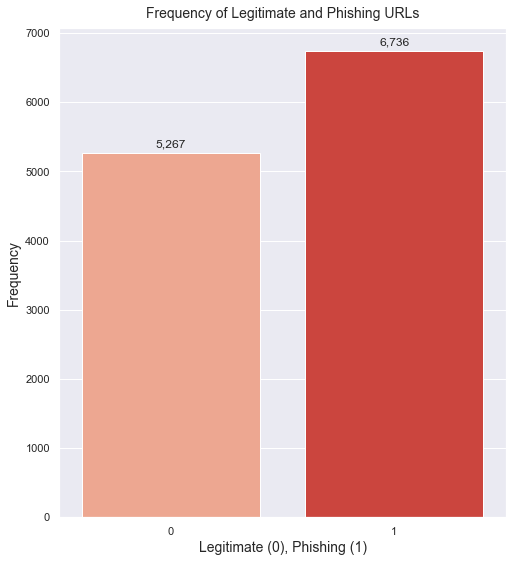

In [79]:
plt.figure(figsize = (8, 9))        
bar = sns.countplot(x=df["Label"], 
              data=df, 
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 14, pad = 10)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
rf.feature_importances_

array([6.55861130e-02, 2.11841800e-01, 1.86326138e-02, 0.00000000e+00,
       2.17459476e-03, 3.81870691e-03, 0.00000000e+00, 1.42192999e-05,
       1.80460817e-02, 3.82917272e-04, 6.36640685e-03, 1.97909177e-02,
       1.51304962e-03, 1.39899487e-03, 3.18792763e-02, 1.59498560e-03,
       0.00000000e+00, 1.20888919e-03, 2.19174126e-02, 2.55650132e-04,
       1.68227548e-04, 8.77553103e-03, 9.17495617e-03, 9.09436384e-03,
       5.65103152e-01, 1.00091418e-04, 7.78743322e-05, 1.36779522e-04,
       9.46394169e-04])

<BarContainer object of 29 artists>

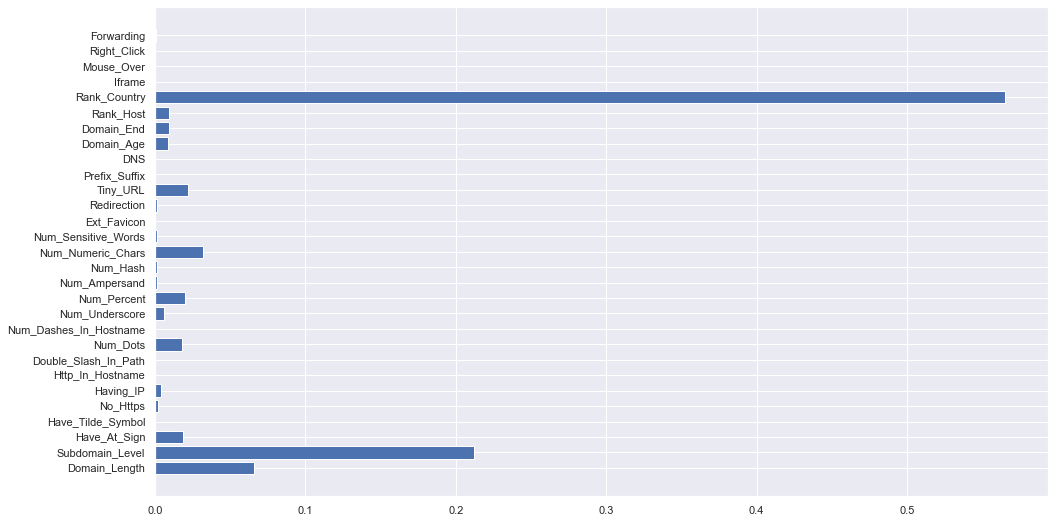

In [83]:
plt.barh(features, rf.feature_importances_)

# **2. Huấn luyện mô hình - Classification**

**Split dataset**

In [84]:
Y = y

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [87]:
print('Kích thước tập huấn luyện: ', X_train.shape, y_train.shape)
print('Kích thước tập kiểm tra: ', X_test.shape, y_test.shape)

Kích thước tập huấn luyện:  (9602, 29) (9602,)
Kích thước tập kiểm tra:  (2401, 29) (2401,)


In [88]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_test, y_test, y_prediction):
    print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
    #Accuracy
    print("1. Accuracy:",metrics.accuracy_score(y_prediction,y_test))
    # confusion_matrix
    print('2. confusion_matrix:')
    matrix = confusion_matrix(y_prediction,y_test)
    print(matrix)
    df_cm = pd.DataFrame(matrix, index = [i for i in "01"], columns = [i for i in "01"])
    plt.figure(figsize = (13,10))
    sns.set(font_scale=1)
    s = sns.heatmap(df_cm, annot=True, vmax=1200, fmt="d")
    s.set(xlabel='Predictions', ylabel='Actuals')
    # recall_score
    print('3. recall_score: ', recall_score(y_prediction,y_test))
    # precision_score
    print('4. precision_score: ', precision_score(y_prediction,y_test))
    # f1_score
    print('5. f1_score: ', f1_score(y_prediction,y_test))
    # ROC plot
    print('6. Biểu đồ ROC của mô hình:')
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.show()

In [89]:
#computing the accuracy, f1_score, Recall, precision of the model performance
def show_result(model_name, y_train_model, y_test_model):
    acc_train_model = metrics.accuracy_score(y_train,y_train_model)
    acc_test_model = metrics.accuracy_score(y_test,y_test_model)
    print(model_name + " : Accuracy on training Data: {:.3f}".format(acc_train_model))
    print(model_name + " : Accuracy on test Data: {:.3f}".format(acc_test_model))
    print()

    f1_score_train_model = metrics.f1_score(y_train,y_train_model)
    f1_score_test_model = metrics.f1_score(y_test,y_test_model)
    print(model_name + " : f1_score on training Data: {:.3f}".format(f1_score_train_model))
    print(model_name + " : f1_score on test Data: {:.3f}".format(f1_score_test_model))
    print()

    recall_score_train_model = metrics.recall_score(y_train,y_train_model)
    recall_score_test_model = metrics.recall_score(y_test,y_test_model)
    print(model_name + " : Recall on training Data: {:.3f}".format(recall_score_train_model))
    print(model_name + " : Recall on test Data: {:.3f}".format(recall_score_test_model))
    print()

    precision_score_train_model = metrics.precision_score(y_train,y_train_model)
    precision_score_test_model = metrics.precision_score(y_test,y_test_model)
    print(model_name + " : precision on training Data: {:.3f}".format(precision_score_train_model))
    print(model_name + " : precision on test Data: {:.3f}".format(precision_score_test_model))

    #computing the classification report of the model

    print(metrics.classification_report(y_test, y_test_model))

In [90]:
def re_training(modelClassifier, param='max_depth', min = 1, max = 10, option=1):
    training_accuracy = []
    test_accuracy = []
    test_recall = []
    test_precision = []
    test_f1_score = []
    # try max_depth from 1 to 20
    for n in range(min,max):
        if param == 'random_state' :
            model_test =  modelClassifier(random_state=n*option)
        elif param == 'n_estimators':
            model_test =  modelClassifier(n_estimators=n*option)
        elif param == 'learning_rate':
            model_test =  modelClassifier(learning_rate=n*option)
        elif param == 'max_depth':
            model_test =  modelClassifier(max_depth=n*option)
        elif param == 'num_trees':
            model_test =  modelClassifier(num_trees=n*option)

        model_test.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(model_test.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(model_test.score(X_test, y_test))
        test_recall.append(metrics.recall_score(y_test,model_test.predict(X_test)))
        test_precision.append(metrics.precision_score(y_test,model_test.predict(X_test)))
        test_f1_score.append(metrics.f1_score(y_test,model_test.predict(X_test)))

    #plotting the training & testing accuracy for n_estimators from 1 to 20
    plt.figure(figsize=None)
    plt.plot(range(min,max), training_accuracy, label="training accuracy")
    plt.plot(range(min,max), test_accuracy, label="test accuracy")
    plt.plot(range(min,max), test_recall, label="test recall")
    plt.plot(range(min,max), test_precision, label="test precision")
    plt.plot(range(min,max), test_f1_score, label="test f1_score")
    plt.ylabel("Accuracy")  
    plt.xlabel(param)
    plt.legend();

**Logistic Regression**

In [91]:
# #Given smote, we have to do a little adjustment
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# logreg = LogisticRegression(fit_intercept=True, penalty='l2')
# logreg.fit(X_train, Y_train)

# logregprediction=logreg.predict(X_test)

# evaluate_model (logreg, X_test, y_test, logregprediction)

**Linear Discriminant Analysis**

In [92]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train, Y_train)

# lda_prediction=lda.predict(X_test)

# evaluate_model (lda, X_test, y_test, lda_prediction)

**Gaussian Naive Bayes**

In [93]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, Y_train)

# gnbprediction=gnb.predict(X_test)

# evaluate_model (gnb, X_test, y_test, gnbprediction)

**Decision Tree Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9775093710953769
2. confusion_matrix:
[[1047   38]
 [  16 1300]]
3. recall_score:  0.9878419452887538
4. precision_score:  0.9715994020926756
5. f1_score:  0.9796533534287867
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


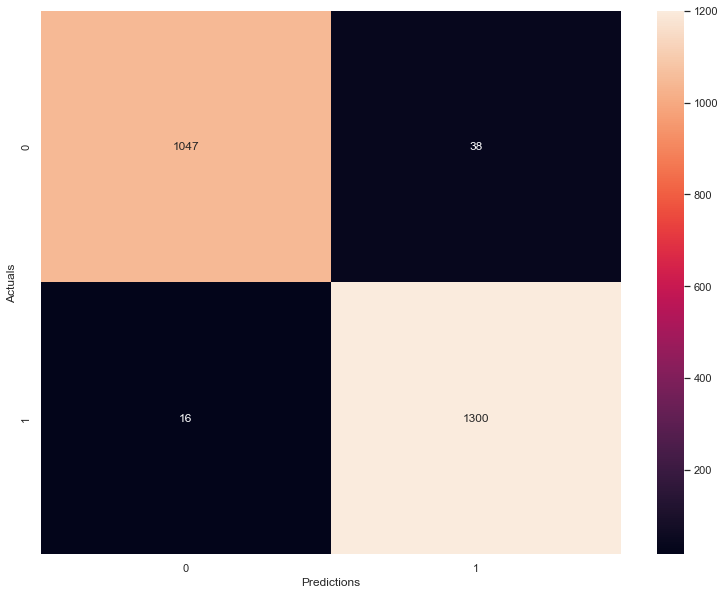

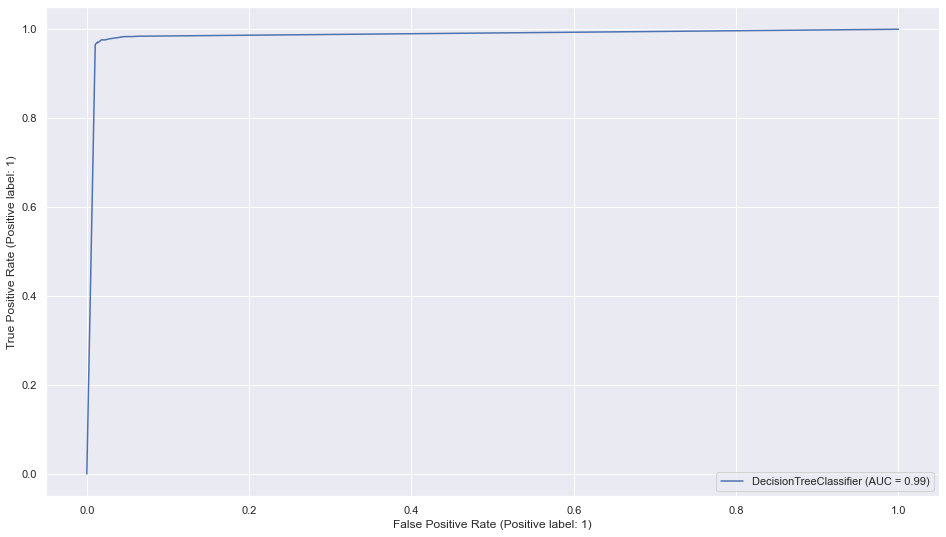

In [94]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(random_state=72)
dtc.fit(X_train, Y_train)

dtcprediction=dtc.predict(X_test)

evaluate_model (dtc, X_test, y_test, dtcprediction)


Decision Tree : Accuracy on training Data: 0.993
Decision Tree : Accuracy on test Data: 0.977

Decision Tree : f1_score on training Data: 0.994
Decision Tree : f1_score on test Data: 0.979

Decision Tree : Recall on training Data: 0.990
Decision Tree : Recall on test Data: 0.972

Decision Tree : precision on training Data: 0.998
Decision Tree : precision on test Data: 0.986
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1063
           1       0.99      0.97      0.98      1338

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



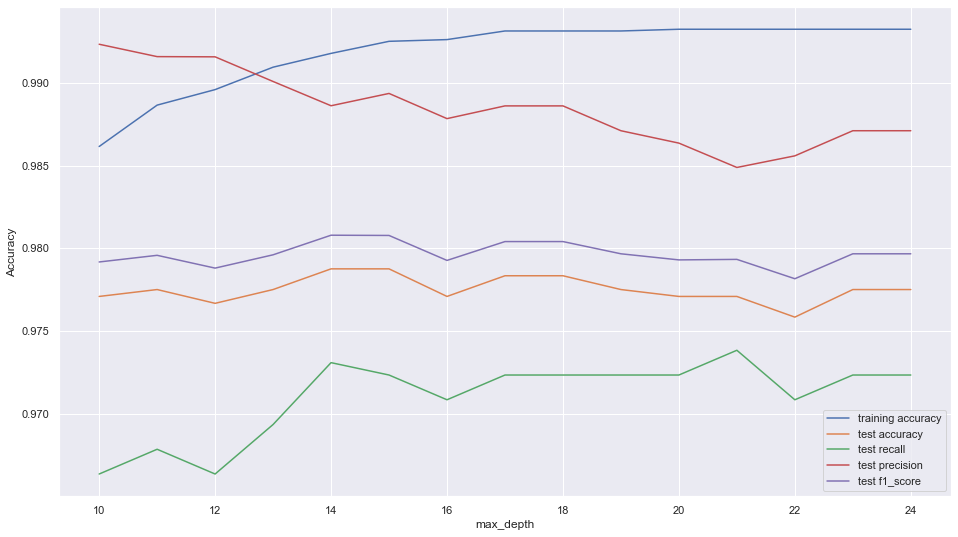

In [95]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,Y_train)
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
show_result('Decision Tree', y_train_tree, y_test_tree)

re_training(DecisionTreeClassifier, 'max_depth', min=10, max=25)

**Random Forest Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9812578092461475
2. confusion_matrix:
[[1048   30]
 [  15 1308]]
3. recall_score:  0.9886621315192744
4. precision_score:  0.9775784753363229
5. f1_score:  0.9830890642615558
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


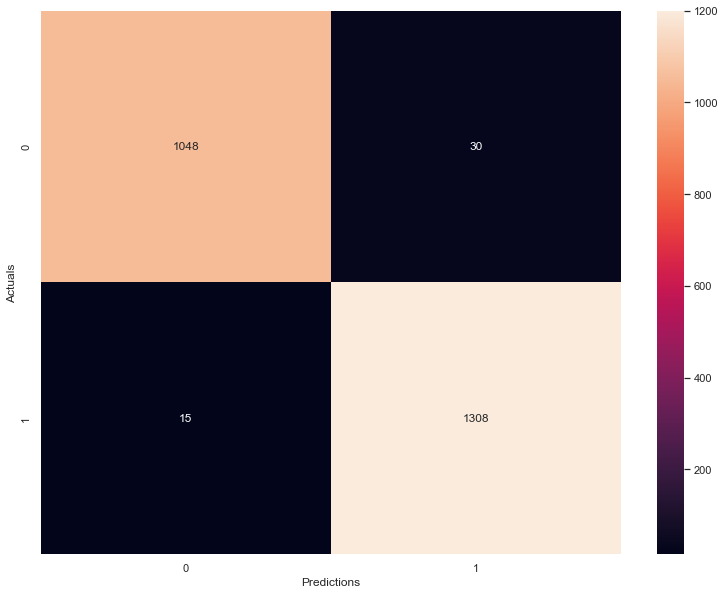

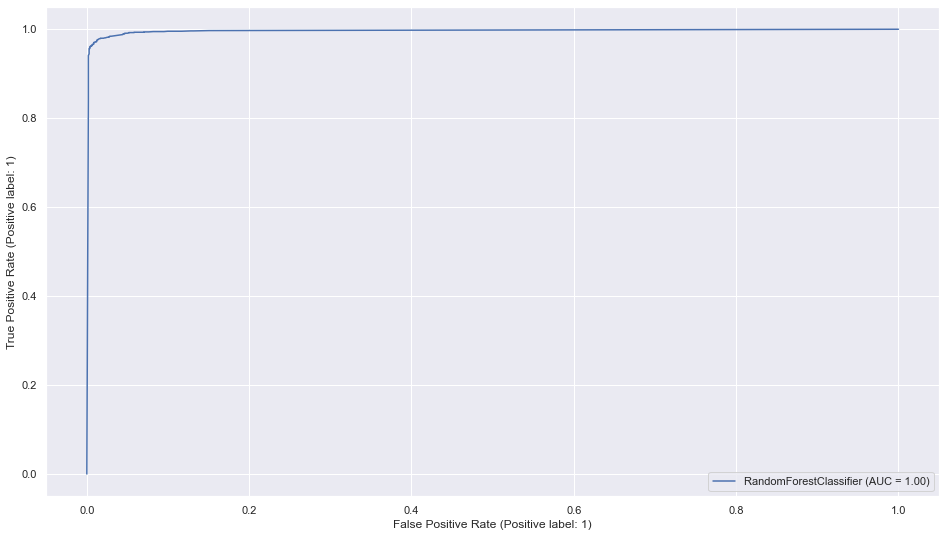

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_jobs=-1,random_state=47)
# learning
rfc.fit(X_train,Y_train)
# Prediction
rfcprediction=rfc.predict(X_test)

evaluate_model (rfc, X_test, y_test, rfcprediction)


In [97]:
# instantiate the model
forest = RandomForestClassifier(n_estimators=39)

# fit the model 
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance
show_result('Random Forest', y_train_forest, y_test_forest)

# re_training(RandomForestClassifier, 'n_estimators', min=10, max=50)

Random Forest : Accuracy on training Data: 0.993
Random Forest : Accuracy on test Data: 0.981

Random Forest : f1_score on training Data: 0.994
Random Forest : f1_score on test Data: 0.983

Random Forest : Recall on training Data: 0.991
Random Forest : Recall on test Data: 0.977

Random Forest : precision on training Data: 0.997
Random Forest : precision on test Data: 0.989
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1063
           1       0.99      0.98      0.98      1338

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



**SVM Classifier**

In [98]:
# from sklearn import svm
# #making the instance
# svc = svm.SVC(random_state=123)
# #learning
# svc.fit(X_train,Y_train)
# #Prediction
# svcprediction=svc.predict(X_test)

# evaluate_model (svc, X_test, y_test, svcprediction)

**K-NearestNeighbours Classifier**

In [99]:
# from sklearn.neighbors import KNeighborsClassifier
# #making the instance
# knn = KNeighborsClassifier()
# #learning
# knn.fit(X_train,Y_train)
# #Prediction
# knnprediction=knn.predict(X_test)

# evaluate_model (knn, X_test, y_test, knnprediction)

**Ada Boost**

In [100]:
# from sklearn.ensemble import AdaBoostClassifier

# ada_model = AdaBoostClassifier(n_estimators=200, random_state=44)

# #learning
# ada_model.fit(X_train,Y_train)
# #Prediction
# ada_modelprediction=ada_model.predict(X_test)

# evaluate_model (ada_model, X_test, y_test, ada_modelprediction)

**XGB Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9762598917117867
2. confusion_matrix:
[[1041   35]
 [  22 1303]]
3. recall_score:  0.9833962264150944
4. precision_score:  0.9738415545590433
5. f1_score:  0.9785955689072474
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


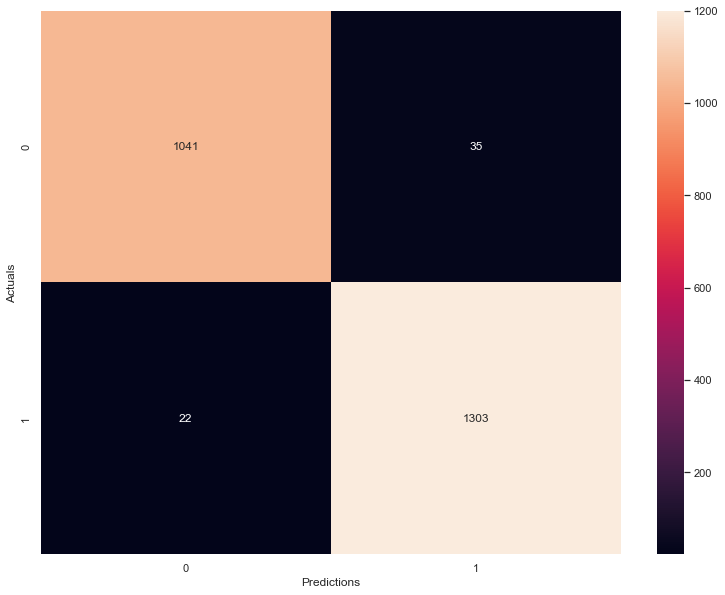

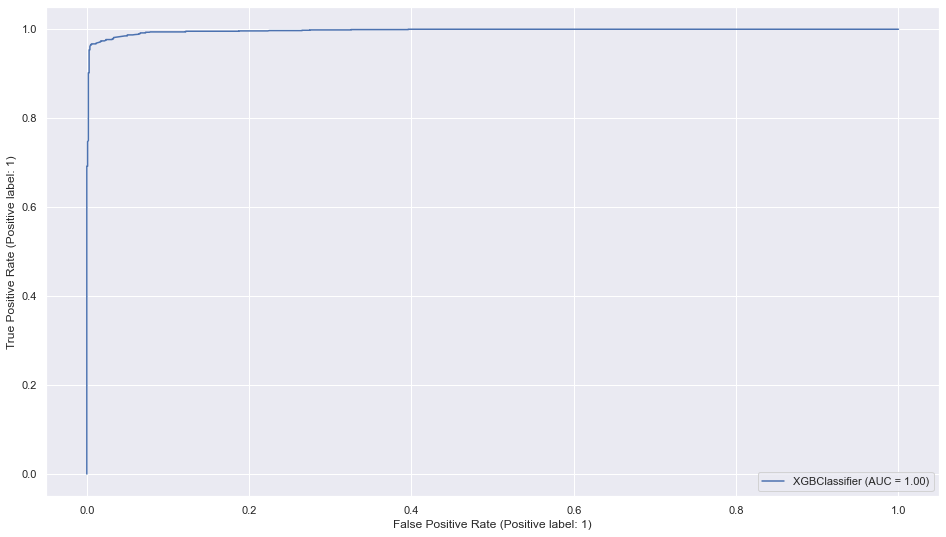

In [101]:
from xgboost import XGBClassifier

XGB_1 = XGBClassifier(objective='binary:logistic',scale_pos_weight=1,n_estimators=85, eta=0.3, subsample=1, colsample_bytree=1)

#learning
XGB_1.fit(X_train,Y_train)
#Prediction
XGB_modelprediction=XGB_1.predict(X_test)

evaluate_model (XGB_1, X_test, y_test, XGB_modelprediction)

**XGB Classifier Ver_2**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9775093710953769
2. confusion_matrix:
[[1043   34]
 [  20 1304]]
3. recall_score:  0.9848942598187311
4. precision_score:  0.9745889387144993
5. f1_score:  0.9797145003756573
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


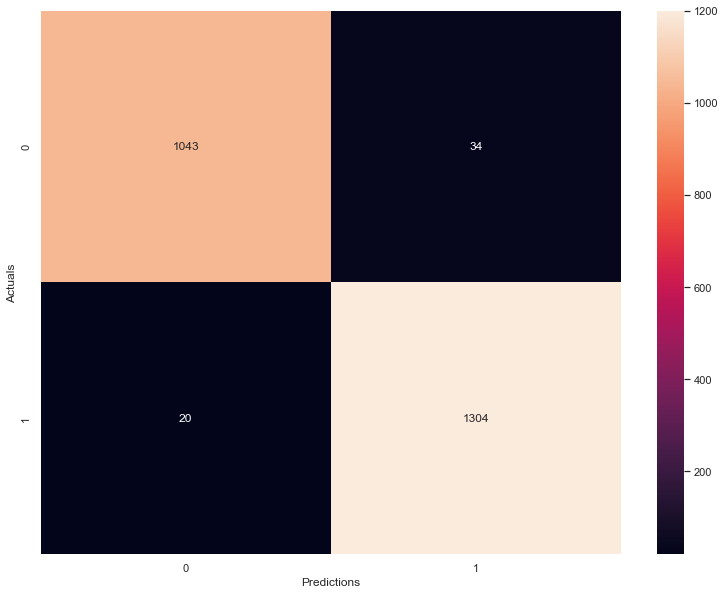

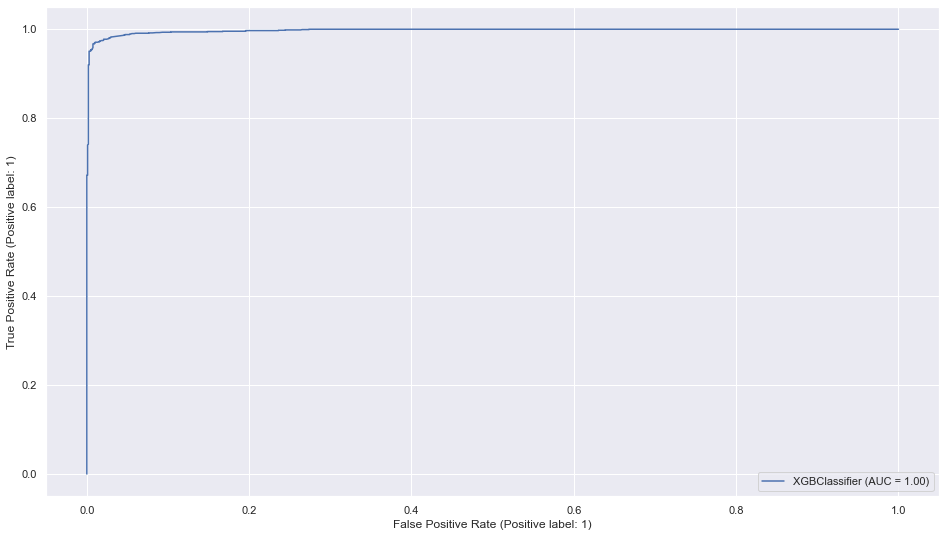

In [102]:
xgb_2 = XGBClassifier(learning_rate=0.4,max_depth=7)
#learning
xgb_2.fit(X_train,Y_train)
#Prediction
xgb_2_modelprediction_v2=xgb_2.predict(X_test)

evaluate_model (xgb_2, X_test, y_test, xgb_2_modelprediction_v2)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9775093710953769
2. confusion_matrix:
[[1043   34]
 [  20 1304]]
3. recall_score:  0.9848942598187311
4. precision_score:  0.9745889387144993
5. f1_score:  0.9797145003756573
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


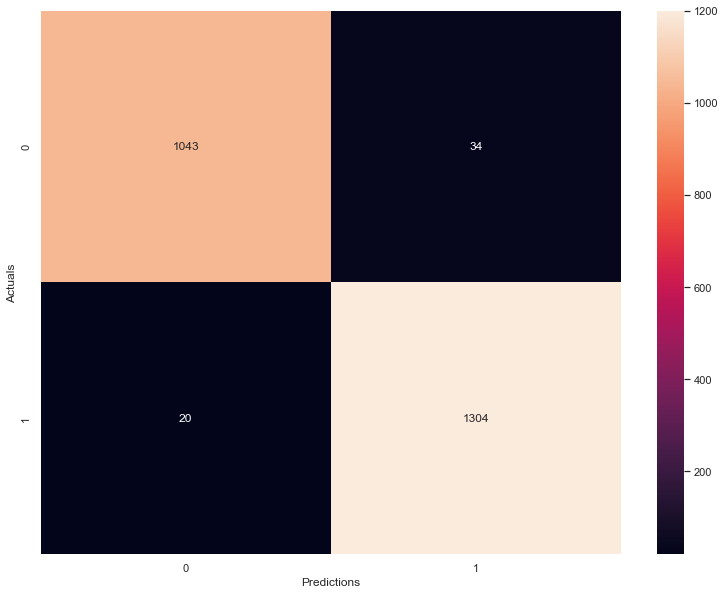

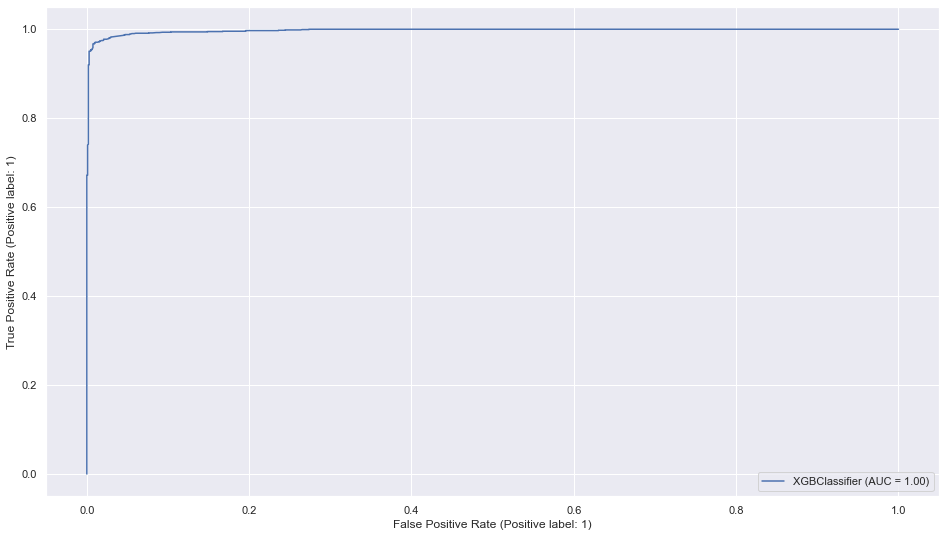

In [103]:
from xgboost import XGBClassifier

# instantiate the model
xgb_3 = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb_3.fit(X_train, Y_train)

#predicting the target value from the model for the samples
y_test_xgb = xgb_3.predict(X_test)

evaluate_model (xgb_3, X_test, y_test, y_test_xgb)

XGB : Accuracy on training Data: 0.993
XGB : Accuracy on test Data: 0.979

XGB : f1_score on training Data: 0.994
XGB : f1_score on test Data: 0.981

XGB : Recall on training Data: 0.991
XGB : Recall on test Data: 0.976

XGB : precision on training Data: 0.997
XGB : precision on test Data: 0.986
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1063
           1       0.99      0.98      0.98      1338

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



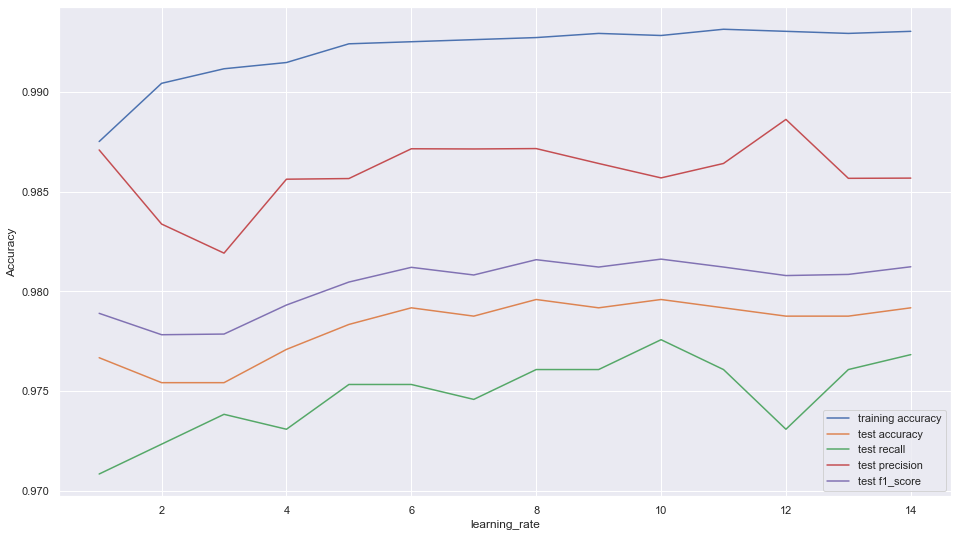

In [104]:
# instantiate the model
xgb = XGBClassifier(learning_rate=1.1)

# fit the model 
xgb.fit(X_train,y_train)

y_train_model = xgb.predict(X_train)
y_test_model = xgb.predict(X_test)

show_result('XGB', y_train_model, y_test_model)
#
re_training(XGBClassifier, 'learning_rate', 1, 15, 0.1)

In [106]:
# print(training_accuracy)
# print(test_accuracy)
# print(model_test.score(X_train, y_train))
# y_test_model = model_test.predict(X_test)
# print(metrics.precision_score(y_test,y_test_model))

**Light GBM**

In [107]:
# from lightgbm import LGBMClassifier

# lgbm_clf = LGBMClassifier(n_estimators=1000, objective='binary',
#                           class_weight={0:25, 1:1}, learning_rate=0.01,
#                           boosting_type='dart')
# lgbm_clf.fit(X_train, Y_train)

# #Prediction
# LGBM_modelprediction=lgbm_clf.predict(X_test)

# evaluate_model (lgbm_clf, X_test, y_test, LGBM_modelprediction)

**Voting Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9808413161182841
2. confusion_matrix:
[[1051   34]
 [  12 1304]]
3. recall_score:  0.9908814589665653
4. precision_score:  0.9745889387144993
5. f1_score:  0.9826676714393369
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


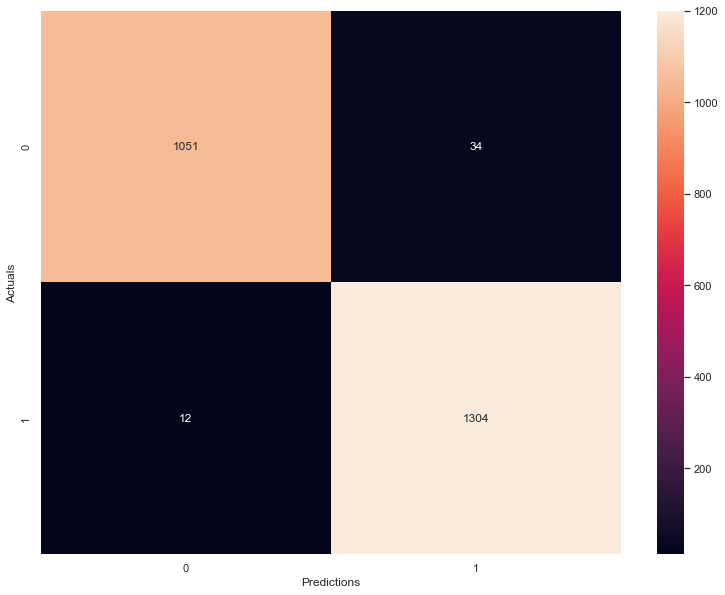

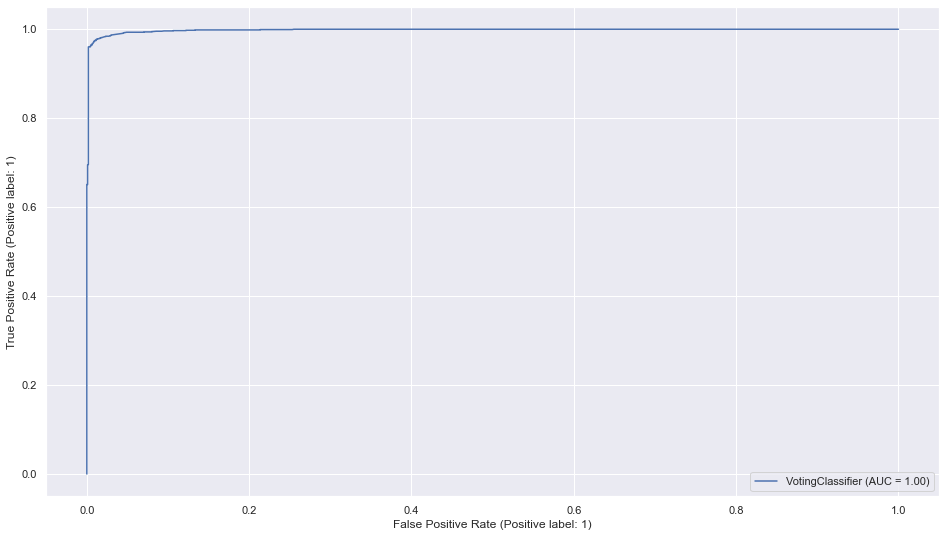

In [108]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, class_weight={0: 100, 1: 1})
clf2 = GradientBoostingClassifier(n_estimators=1000, max_depth=7)
clf3 = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})
clf4 = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
pos_clf = VotingClassifier(estimators=[('pos', clf1), ('gb', clf2),
                                        ('et', clf3), ('xgb', clf4)],
                            voting='soft',
                            weights=[1, 2, 1, 1])

pos_clf.fit(X_train, Y_train)

#Prediction
Vot_modelprediction=pos_clf.predict(X_test)

evaluate_model (pos_clf, X_test, y_test, Vot_modelprediction)

**Gradient Boosting Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9795918367346939
2. confusion_matrix:
[[1048   34]
 [  15 1304]]
3. recall_score:  0.9886277482941622
4. precision_score:  0.9745889387144993
5. f1_score:  0.9815581482875423
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


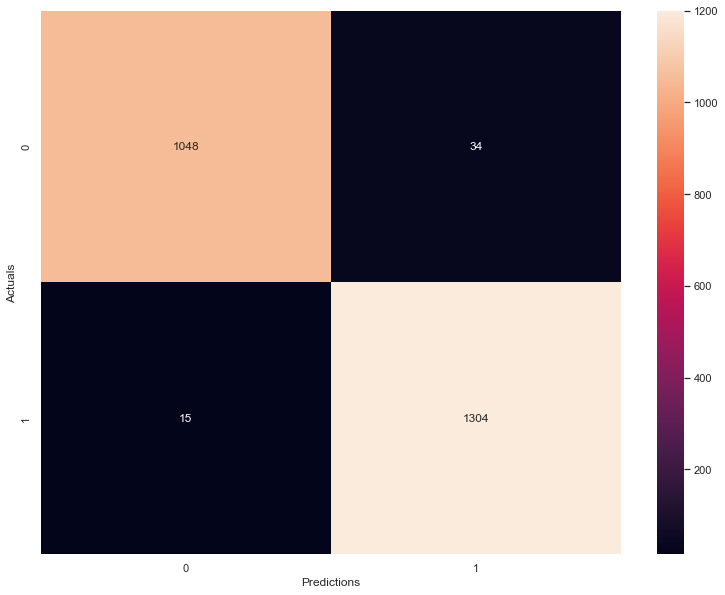

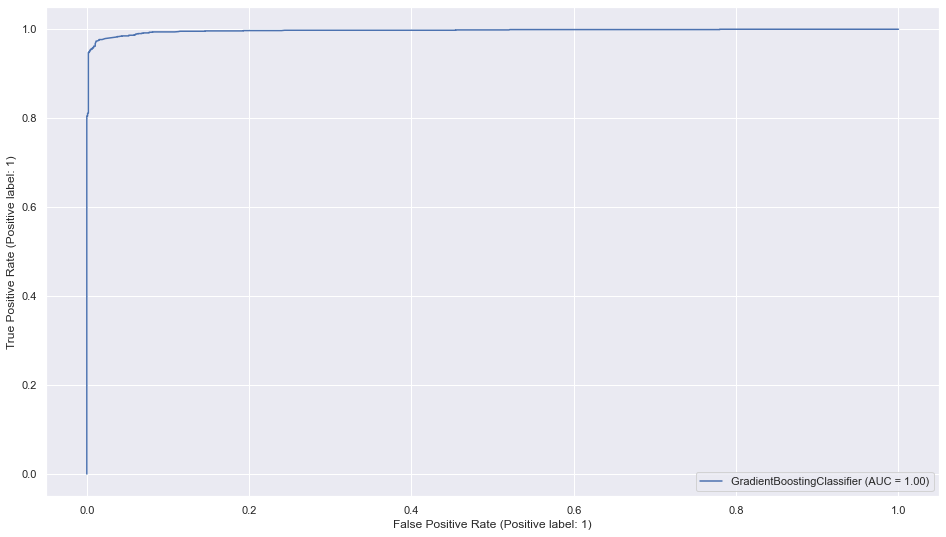

In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

GBoost = GradientBoostingClassifier(n_estimators=1000, max_depth=7)


GBoost.fit(X_train, Y_train)

#Prediction
GBoost_modelprediction=GBoost.predict(X_test)

evaluate_model (GBoost, X_test, y_test, GBoost_modelprediction)

**Extra Trees Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9812578092461475
2. confusion_matrix:
[[1056   38]
 [   7 1300]]
3. recall_score:  0.9946442234123948
4. precision_score:  0.9715994020926756
5. f1_score:  0.9829867674858223
6. Biểu đồ ROC của mô hình:


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


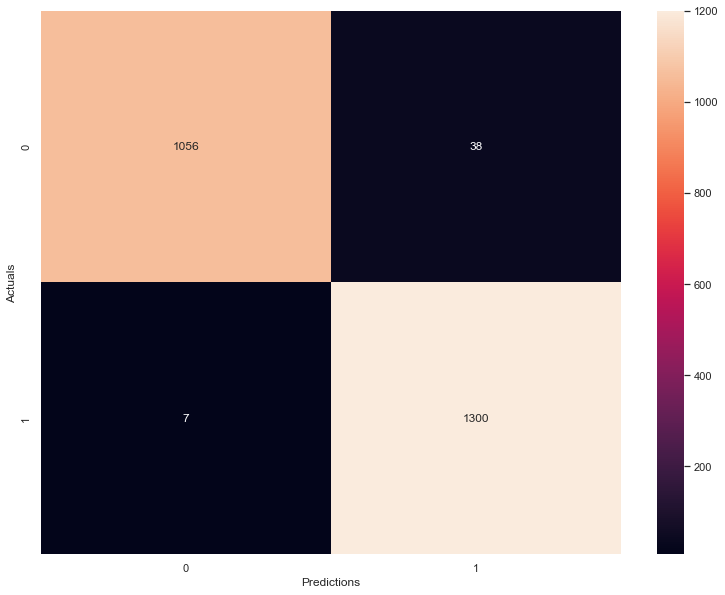

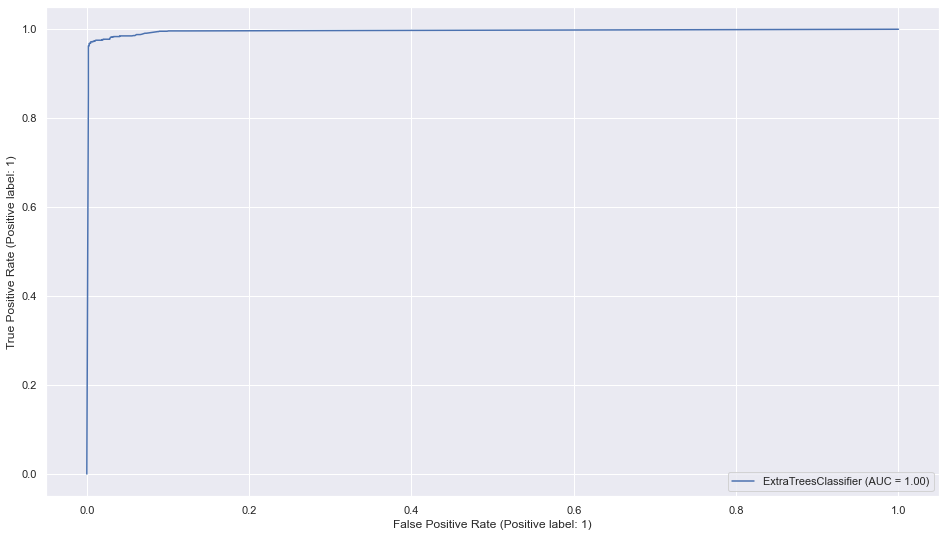

In [111]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

Extra = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})


Extra.fit(X_train, Y_train)

#Prediction
Extra_modelprediction=Extra.predict(X_test)

evaluate_model (Extra, X_test, y_test, Extra_modelprediction)

**Cat Boosting**

In [112]:
# pip install catboost

0:	learn: 0.5312356	total: 154ms	remaining: 2m 33s
1:	learn: 0.4094970	total: 172ms	remaining: 1m 25s
2:	learn: 0.3249984	total: 197ms	remaining: 1m 5s
3:	learn: 0.2667346	total: 213ms	remaining: 53.1s
4:	learn: 0.2180671	total: 232ms	remaining: 46.2s
5:	learn: 0.1862444	total: 257ms	remaining: 42.5s
6:	learn: 0.1620782	total: 286ms	remaining: 40.6s
7:	learn: 0.1499111	total: 303ms	remaining: 37.6s
8:	learn: 0.1362457	total: 321ms	remaining: 35.4s
9:	learn: 0.1245687	total: 340ms	remaining: 33.6s
10:	learn: 0.1152068	total: 357ms	remaining: 32.1s
11:	learn: 0.1051778	total: 376ms	remaining: 30.9s
12:	learn: 0.1006304	total: 390ms	remaining: 29.6s
13:	learn: 0.0945671	total: 404ms	remaining: 28.5s
14:	learn: 0.0903371	total: 420ms	remaining: 27.6s
15:	learn: 0.0871339	total: 438ms	remaining: 26.9s
16:	learn: 0.0844759	total: 453ms	remaining: 26.2s
17:	learn: 0.0815831	total: 471ms	remaining: 25.7s
18:	learn: 0.0783864	total: 487ms	remaining: 25.1s
19:	learn: 0.0751754	total: 500ms	remai

168:	learn: 0.0252422	total: 2.97s	remaining: 14.6s
169:	learn: 0.0252238	total: 2.98s	remaining: 14.6s
170:	learn: 0.0250971	total: 3s	remaining: 14.5s
171:	learn: 0.0249654	total: 3.02s	remaining: 14.5s
172:	learn: 0.0249654	total: 3.04s	remaining: 14.5s
173:	learn: 0.0249165	total: 3.06s	remaining: 14.5s
174:	learn: 0.0248094	total: 3.08s	remaining: 14.5s
175:	learn: 0.0247711	total: 3.1s	remaining: 14.5s
176:	learn: 0.0247448	total: 3.12s	remaining: 14.5s
177:	learn: 0.0246916	total: 3.13s	remaining: 14.5s
178:	learn: 0.0245662	total: 3.15s	remaining: 14.4s
179:	learn: 0.0245424	total: 3.17s	remaining: 14.4s
180:	learn: 0.0244895	total: 3.18s	remaining: 14.4s
181:	learn: 0.0244893	total: 3.21s	remaining: 14.4s
182:	learn: 0.0244893	total: 3.22s	remaining: 14.4s
183:	learn: 0.0243820	total: 3.24s	remaining: 14.4s
184:	learn: 0.0243647	total: 3.25s	remaining: 14.3s
185:	learn: 0.0243647	total: 3.27s	remaining: 14.3s
186:	learn: 0.0243646	total: 3.28s	remaining: 14.3s
187:	learn: 0.02

330:	learn: 0.0236839	total: 5.36s	remaining: 10.8s
331:	learn: 0.0236839	total: 5.37s	remaining: 10.8s
332:	learn: 0.0235862	total: 5.39s	remaining: 10.8s
333:	learn: 0.0235862	total: 5.4s	remaining: 10.8s
334:	learn: 0.0235863	total: 5.42s	remaining: 10.8s
335:	learn: 0.0235861	total: 5.43s	remaining: 10.7s
336:	learn: 0.0235862	total: 5.44s	remaining: 10.7s
337:	learn: 0.0235861	total: 5.46s	remaining: 10.7s
338:	learn: 0.0235861	total: 5.47s	remaining: 10.7s
339:	learn: 0.0235860	total: 5.49s	remaining: 10.6s
340:	learn: 0.0235860	total: 5.5s	remaining: 10.6s
341:	learn: 0.0235861	total: 5.52s	remaining: 10.6s
342:	learn: 0.0235861	total: 5.54s	remaining: 10.6s
343:	learn: 0.0235861	total: 5.55s	remaining: 10.6s
344:	learn: 0.0235860	total: 5.57s	remaining: 10.6s
345:	learn: 0.0235860	total: 5.58s	remaining: 10.6s
346:	learn: 0.0235860	total: 5.6s	remaining: 10.5s
347:	learn: 0.0235861	total: 5.61s	remaining: 10.5s
348:	learn: 0.0235860	total: 5.63s	remaining: 10.5s
349:	learn: 0.0

496:	learn: 0.0235222	total: 7.94s	remaining: 8.04s
497:	learn: 0.0235222	total: 7.95s	remaining: 8.02s
498:	learn: 0.0235222	total: 7.97s	remaining: 8s
499:	learn: 0.0235222	total: 7.98s	remaining: 7.98s
500:	learn: 0.0235221	total: 8s	remaining: 7.97s
501:	learn: 0.0235221	total: 8.01s	remaining: 7.95s
502:	learn: 0.0235222	total: 8.03s	remaining: 7.93s
503:	learn: 0.0235222	total: 8.04s	remaining: 7.92s
504:	learn: 0.0235222	total: 8.06s	remaining: 7.9s
505:	learn: 0.0235222	total: 8.07s	remaining: 7.88s
506:	learn: 0.0235221	total: 8.1s	remaining: 7.87s
507:	learn: 0.0235222	total: 8.11s	remaining: 7.86s
508:	learn: 0.0235220	total: 8.13s	remaining: 7.84s
509:	learn: 0.0235219	total: 8.15s	remaining: 7.83s
510:	learn: 0.0235220	total: 8.16s	remaining: 7.81s
511:	learn: 0.0235219	total: 8.18s	remaining: 7.79s
512:	learn: 0.0235219	total: 8.19s	remaining: 7.78s
513:	learn: 0.0235219	total: 8.21s	remaining: 7.76s
514:	learn: 0.0235219	total: 8.22s	remaining: 7.74s
515:	learn: 0.023521

668:	learn: 0.0235217	total: 10.7s	remaining: 5.3s
669:	learn: 0.0235217	total: 10.7s	remaining: 5.28s
670:	learn: 0.0235217	total: 10.7s	remaining: 5.26s
671:	learn: 0.0235217	total: 10.7s	remaining: 5.24s
672:	learn: 0.0235217	total: 10.7s	remaining: 5.22s
673:	learn: 0.0235217	total: 10.8s	remaining: 5.21s
674:	learn: 0.0235217	total: 10.8s	remaining: 5.19s
675:	learn: 0.0235217	total: 10.8s	remaining: 5.17s
676:	learn: 0.0235217	total: 10.8s	remaining: 5.15s
677:	learn: 0.0235217	total: 10.8s	remaining: 5.14s
678:	learn: 0.0235217	total: 10.8s	remaining: 5.12s
679:	learn: 0.0235217	total: 10.8s	remaining: 5.1s
680:	learn: 0.0235217	total: 10.9s	remaining: 5.08s
681:	learn: 0.0235217	total: 10.9s	remaining: 5.07s
682:	learn: 0.0235217	total: 10.9s	remaining: 5.05s
683:	learn: 0.0235217	total: 10.9s	remaining: 5.03s
684:	learn: 0.0235217	total: 10.9s	remaining: 5.02s
685:	learn: 0.0235217	total: 10.9s	remaining: 5s
686:	learn: 0.0235217	total: 10.9s	remaining: 4.99s
687:	learn: 0.023

829:	learn: 0.0235217	total: 13s	remaining: 2.66s
830:	learn: 0.0235217	total: 13s	remaining: 2.65s
831:	learn: 0.0235217	total: 13s	remaining: 2.63s
832:	learn: 0.0235217	total: 13s	remaining: 2.61s
833:	learn: 0.0235217	total: 13.1s	remaining: 2.6s
834:	learn: 0.0235217	total: 13.1s	remaining: 2.58s
835:	learn: 0.0235217	total: 13.1s	remaining: 2.57s
836:	learn: 0.0235217	total: 13.1s	remaining: 2.55s
837:	learn: 0.0235217	total: 13.1s	remaining: 2.53s
838:	learn: 0.0235217	total: 13.1s	remaining: 2.52s
839:	learn: 0.0235217	total: 13.1s	remaining: 2.5s
840:	learn: 0.0235217	total: 13.2s	remaining: 2.49s
841:	learn: 0.0235217	total: 13.2s	remaining: 2.47s
842:	learn: 0.0235217	total: 13.2s	remaining: 2.45s
843:	learn: 0.0235217	total: 13.2s	remaining: 2.44s
844:	learn: 0.0235217	total: 13.2s	remaining: 2.42s
845:	learn: 0.0235217	total: 13.2s	remaining: 2.41s
846:	learn: 0.0235217	total: 13.2s	remaining: 2.39s
847:	learn: 0.0235217	total: 13.2s	remaining: 2.37s
848:	learn: 0.0235217	

990:	learn: 0.0235217	total: 15.3s	remaining: 139ms
991:	learn: 0.0235217	total: 15.3s	remaining: 123ms
992:	learn: 0.0235217	total: 15.3s	remaining: 108ms
993:	learn: 0.0235217	total: 15.3s	remaining: 92.3ms
994:	learn: 0.0235217	total: 15.3s	remaining: 76.9ms
995:	learn: 0.0235217	total: 15.3s	remaining: 61.5ms
996:	learn: 0.0235217	total: 15.3s	remaining: 46.1ms
997:	learn: 0.0235217	total: 15.4s	remaining: 30.8ms
998:	learn: 0.0235217	total: 15.4s	remaining: 15.4ms
999:	learn: 0.0235217	total: 15.4s	remaining: 0us
CatBoost Classifier : Accuracy on training Data: 0.992
CatBoost Classifier : Accuracy on test Data: 0.979

CatBoost Classifier : f1_score on training Data: 0.993
CatBoost Classifier : f1_score on test Data: 0.981

CatBoost Classifier : Recall on training Data: 0.989
CatBoost Classifier : Recall on test Data: 0.974

CatBoost Classifier : precision on training Data: 0.997
CatBoost Classifier : precision on test Data: 0.989
              precision    recall  f1-score   suppo

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


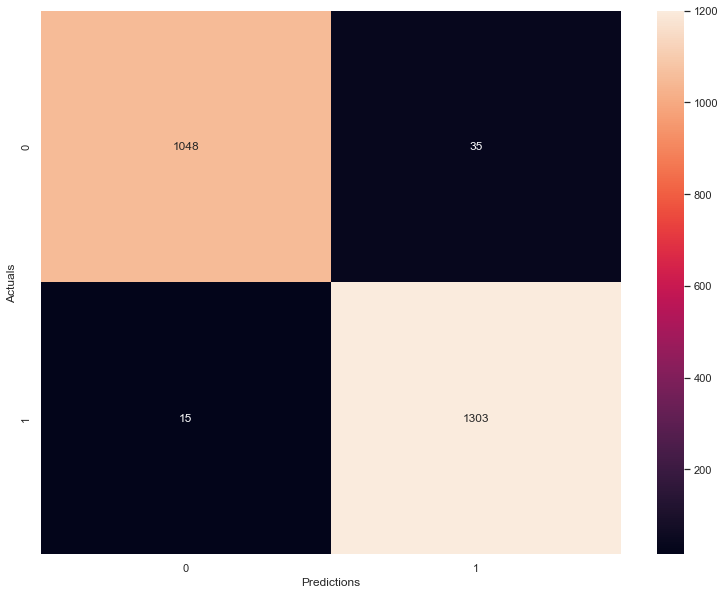

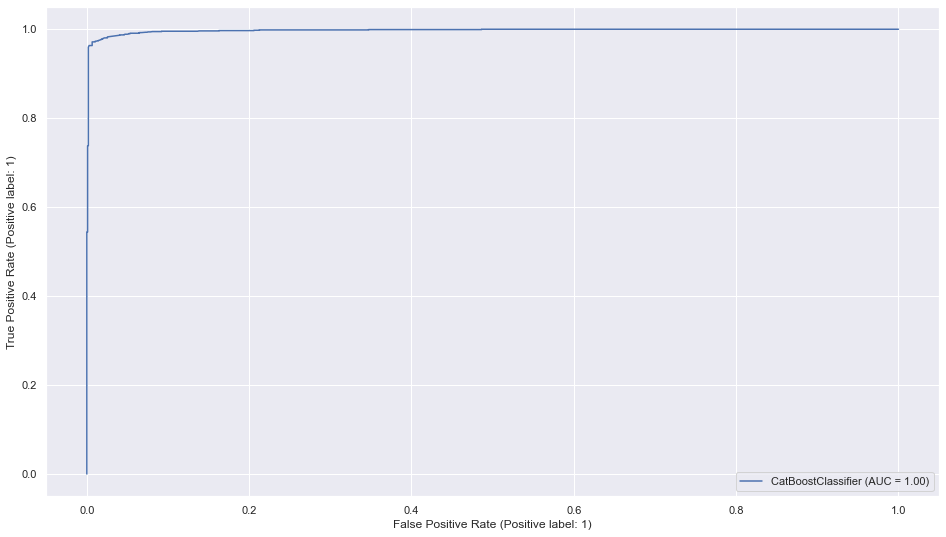

In [114]:
from catboost import CatBoostClassifier

model_catboss = CatBoostClassifier(learning_rate = 0.1, depth = 8, rsm = 1)

model_catboss.fit(X_train, Y_train)

# Prediction
cast_modelprediction=model_catboss.predict(X_test)

y_train_cat = model_catboss.predict(X_train)
y_test_cat = model_catboss.predict(X_test)

show_result('CatBoost Classifier', y_train_cat, y_test_cat)

evaluate_model (model_catboss, X_test, y_test, cast_modelprediction)


0:	learn: 0.2119456	total: 21.4ms	remaining: 21.4s
1:	learn: 0.1065403	total: 43.3ms	remaining: 21.6s
2:	learn: 0.0887045	total: 63ms	remaining: 21s
3:	learn: 0.0732891	total: 82.6ms	remaining: 20.6s
4:	learn: 0.0623913	total: 102ms	remaining: 20.3s
5:	learn: 0.0545708	total: 121ms	remaining: 20s
6:	learn: 0.0526384	total: 141ms	remaining: 20s
7:	learn: 0.0487442	total: 160ms	remaining: 19.8s
8:	learn: 0.0461220	total: 179ms	remaining: 19.7s
9:	learn: 0.0445253	total: 198ms	remaining: 19.6s
10:	learn: 0.0429218	total: 216ms	remaining: 19.4s
11:	learn: 0.0383898	total: 236ms	remaining: 19.5s
12:	learn: 0.0360407	total: 257ms	remaining: 19.5s
13:	learn: 0.0356904	total: 276ms	remaining: 19.4s
14:	learn: 0.0338847	total: 295ms	remaining: 19.4s
15:	learn: 0.0334133	total: 314ms	remaining: 19.3s
16:	learn: 0.0320115	total: 334ms	remaining: 19.3s
17:	learn: 0.0303041	total: 352ms	remaining: 19.2s
18:	learn: 0.0297198	total: 371ms	remaining: 19.2s
19:	learn: 0.0284616	total: 390ms	remaining: 

163:	learn: 0.0166907	total: 2.97s	remaining: 15.1s
164:	learn: 0.0166907	total: 2.99s	remaining: 15.1s
165:	learn: 0.0166905	total: 3s	remaining: 15.1s
166:	learn: 0.0166905	total: 3.01s	remaining: 15s
167:	learn: 0.0166904	total: 3.02s	remaining: 15s
168:	learn: 0.0166904	total: 3.03s	remaining: 14.9s
169:	learn: 0.0166903	total: 3.05s	remaining: 14.9s
170:	learn: 0.0166901	total: 3.06s	remaining: 14.8s
171:	learn: 0.0166902	total: 3.08s	remaining: 14.8s
172:	learn: 0.0166901	total: 3.09s	remaining: 14.8s
173:	learn: 0.0166901	total: 3.1s	remaining: 14.7s
174:	learn: 0.0166899	total: 3.12s	remaining: 14.7s
175:	learn: 0.0166899	total: 3.13s	remaining: 14.7s
176:	learn: 0.0166898	total: 3.14s	remaining: 14.6s
177:	learn: 0.0166896	total: 3.16s	remaining: 14.6s
178:	learn: 0.0166895	total: 3.17s	remaining: 14.5s
179:	learn: 0.0166894	total: 3.2s	remaining: 14.6s
180:	learn: 0.0166893	total: 3.21s	remaining: 14.5s
181:	learn: 0.0166891	total: 3.23s	remaining: 14.5s
182:	learn: 0.0166891

336:	learn: 0.0166417	total: 5.75s	remaining: 11.3s
337:	learn: 0.0166416	total: 5.77s	remaining: 11.3s
338:	learn: 0.0166415	total: 5.78s	remaining: 11.3s
339:	learn: 0.0166415	total: 5.8s	remaining: 11.3s
340:	learn: 0.0166414	total: 5.81s	remaining: 11.2s
341:	learn: 0.0166413	total: 5.83s	remaining: 11.2s
342:	learn: 0.0166414	total: 5.84s	remaining: 11.2s
343:	learn: 0.0166412	total: 5.86s	remaining: 11.2s
344:	learn: 0.0166413	total: 5.88s	remaining: 11.2s
345:	learn: 0.0166414	total: 5.89s	remaining: 11.1s
346:	learn: 0.0166412	total: 5.91s	remaining: 11.1s
347:	learn: 0.0166411	total: 5.92s	remaining: 11.1s
348:	learn: 0.0166409	total: 5.94s	remaining: 11.1s
349:	learn: 0.0166409	total: 5.95s	remaining: 11.1s
350:	learn: 0.0166408	total: 5.97s	remaining: 11s
351:	learn: 0.0166409	total: 5.98s	remaining: 11s
352:	learn: 0.0166409	total: 5.99s	remaining: 11s
353:	learn: 0.0166406	total: 6s	remaining: 11s
354:	learn: 0.0166405	total: 6.02s	remaining: 10.9s
355:	learn: 0.0166405	to

498:	learn: 0.0157525	total: 8.55s	remaining: 8.59s
499:	learn: 0.0157147	total: 8.57s	remaining: 8.57s
500:	learn: 0.0157049	total: 8.59s	remaining: 8.56s
501:	learn: 0.0157047	total: 8.6s	remaining: 8.53s
502:	learn: 0.0157042	total: 8.62s	remaining: 8.51s
503:	learn: 0.0157042	total: 8.63s	remaining: 8.49s
504:	learn: 0.0157040	total: 8.64s	remaining: 8.47s
505:	learn: 0.0157039	total: 8.66s	remaining: 8.45s
506:	learn: 0.0157038	total: 8.67s	remaining: 8.43s
507:	learn: 0.0157037	total: 8.69s	remaining: 8.41s
508:	learn: 0.0157037	total: 8.7s	remaining: 8.39s
509:	learn: 0.0157035	total: 8.71s	remaining: 8.37s
510:	learn: 0.0157035	total: 8.73s	remaining: 8.35s
511:	learn: 0.0157036	total: 8.74s	remaining: 8.33s
512:	learn: 0.0157035	total: 8.76s	remaining: 8.31s
513:	learn: 0.0157034	total: 8.78s	remaining: 8.3s
514:	learn: 0.0157032	total: 8.79s	remaining: 8.28s
515:	learn: 0.0157031	total: 8.8s	remaining: 8.26s
516:	learn: 0.0157030	total: 8.82s	remaining: 8.24s
517:	learn: 0.01

660:	learn: 0.0156372	total: 11.4s	remaining: 5.85s
661:	learn: 0.0156373	total: 11.4s	remaining: 5.84s
662:	learn: 0.0156372	total: 11.5s	remaining: 5.82s
663:	learn: 0.0156371	total: 11.5s	remaining: 5.81s
664:	learn: 0.0156369	total: 11.5s	remaining: 5.79s
665:	learn: 0.0156368	total: 11.5s	remaining: 5.78s
666:	learn: 0.0156369	total: 11.5s	remaining: 5.76s
667:	learn: 0.0156368	total: 11.5s	remaining: 5.74s
668:	learn: 0.0156367	total: 11.6s	remaining: 5.74s
669:	learn: 0.0156369	total: 11.7s	remaining: 5.74s
670:	learn: 0.0156367	total: 11.7s	remaining: 5.73s
671:	learn: 0.0156367	total: 11.7s	remaining: 5.71s
672:	learn: 0.0156366	total: 11.7s	remaining: 5.69s
673:	learn: 0.0156365	total: 11.7s	remaining: 5.67s
674:	learn: 0.0156365	total: 11.7s	remaining: 5.65s
675:	learn: 0.0156364	total: 11.8s	remaining: 5.63s
676:	learn: 0.0156363	total: 11.8s	remaining: 5.62s
677:	learn: 0.0156362	total: 11.8s	remaining: 5.61s
678:	learn: 0.0156362	total: 11.8s	remaining: 5.6s
679:	learn: 0

830:	learn: 0.0152896	total: 14.4s	remaining: 2.93s
831:	learn: 0.0152896	total: 14.4s	remaining: 2.91s
832:	learn: 0.0152897	total: 14.4s	remaining: 2.89s
833:	learn: 0.0152897	total: 14.4s	remaining: 2.87s
834:	learn: 0.0152895	total: 14.4s	remaining: 2.85s
835:	learn: 0.0152895	total: 14.5s	remaining: 2.84s
836:	learn: 0.0152894	total: 14.5s	remaining: 2.82s
837:	learn: 0.0152895	total: 14.5s	remaining: 2.8s
838:	learn: 0.0152894	total: 14.5s	remaining: 2.78s
839:	learn: 0.0152893	total: 14.5s	remaining: 2.77s
840:	learn: 0.0152893	total: 14.5s	remaining: 2.75s
841:	learn: 0.0152892	total: 14.6s	remaining: 2.73s
842:	learn: 0.0152892	total: 14.6s	remaining: 2.72s
843:	learn: 0.0152891	total: 14.6s	remaining: 2.7s
844:	learn: 0.0152891	total: 14.6s	remaining: 2.68s
845:	learn: 0.0152891	total: 14.6s	remaining: 2.66s
846:	learn: 0.0152891	total: 14.7s	remaining: 2.65s
847:	learn: 0.0152891	total: 14.7s	remaining: 2.63s
848:	learn: 0.0152889	total: 14.7s	remaining: 2.61s
849:	learn: 0.

CatBoost Classifier : Accuracy on training Data: 0.993
CatBoost Classifier : Accuracy on test Data: 0.981

CatBoost Classifier : f1_score on training Data: 0.994
CatBoost Classifier : f1_score on test Data: 0.983

CatBoost Classifier : Recall on training Data: 0.991
CatBoost Classifier : Recall on test Data: 0.975

CatBoost Classifier : precision on training Data: 0.997
CatBoost Classifier : precision on test Data: 0.991
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1063
           1       0.99      0.98      0.98      1338

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401

0:	learn: 0.5311540	total: 25.7ms	remaining: 25.6s
1:	learn: 0.3915015	total: 46.5ms	remaining: 23.2s
2:	learn: 0.3162116	total: 68ms	remaining: 22.6s
3:	learn: 0.2723036	total: 96.3ms	remaining: 24s
4:	learn: 0.2352989	total: 118ms	remaining: 23.5

166:	learn: 0.0314717	total: 2.1s	remaining: 10.5s
167:	learn: 0.0313369	total: 2.11s	remaining: 10.5s
168:	learn: 0.0312699	total: 2.12s	remaining: 10.4s
169:	learn: 0.0311299	total: 2.13s	remaining: 10.4s
170:	learn: 0.0310212	total: 2.14s	remaining: 10.4s
171:	learn: 0.0308844	total: 2.15s	remaining: 10.4s
172:	learn: 0.0308259	total: 2.16s	remaining: 10.3s
173:	learn: 0.0307259	total: 2.17s	remaining: 10.3s
174:	learn: 0.0307065	total: 2.18s	remaining: 10.3s
175:	learn: 0.0306745	total: 2.19s	remaining: 10.3s
176:	learn: 0.0306315	total: 2.21s	remaining: 10.3s
177:	learn: 0.0305623	total: 2.21s	remaining: 10.2s
178:	learn: 0.0305477	total: 2.22s	remaining: 10.2s
179:	learn: 0.0305325	total: 2.23s	remaining: 10.2s
180:	learn: 0.0304743	total: 2.24s	remaining: 10.2s
181:	learn: 0.0304356	total: 2.25s	remaining: 10.1s
182:	learn: 0.0303071	total: 2.26s	remaining: 10.1s
183:	learn: 0.0302751	total: 2.27s	remaining: 10.1s
184:	learn: 0.0302509	total: 2.28s	remaining: 10.1s
185:	learn: 0

332:	learn: 0.0249997	total: 3.72s	remaining: 7.45s
333:	learn: 0.0249997	total: 3.73s	remaining: 7.45s
334:	learn: 0.0249738	total: 3.75s	remaining: 7.45s
335:	learn: 0.0249736	total: 3.77s	remaining: 7.46s
336:	learn: 0.0249517	total: 3.8s	remaining: 7.47s
337:	learn: 0.0248753	total: 3.82s	remaining: 7.49s
338:	learn: 0.0248272	total: 3.85s	remaining: 7.5s
339:	learn: 0.0248272	total: 3.87s	remaining: 7.51s
340:	learn: 0.0248272	total: 3.88s	remaining: 7.51s
341:	learn: 0.0248272	total: 3.9s	remaining: 7.51s
342:	learn: 0.0248271	total: 3.91s	remaining: 7.49s
343:	learn: 0.0248271	total: 3.92s	remaining: 7.47s
344:	learn: 0.0248271	total: 3.93s	remaining: 7.46s
345:	learn: 0.0248272	total: 3.94s	remaining: 7.44s
346:	learn: 0.0248269	total: 3.95s	remaining: 7.43s
347:	learn: 0.0248270	total: 3.95s	remaining: 7.41s
348:	learn: 0.0248271	total: 3.96s	remaining: 7.39s
349:	learn: 0.0248269	total: 3.97s	remaining: 7.37s
350:	learn: 0.0248269	total: 3.97s	remaining: 7.34s
351:	learn: 0.0

493:	learn: 0.0230418	total: 5.46s	remaining: 5.6s
494:	learn: 0.0230144	total: 5.48s	remaining: 5.59s
495:	learn: 0.0229753	total: 5.49s	remaining: 5.58s
496:	learn: 0.0229432	total: 5.5s	remaining: 5.56s
497:	learn: 0.0229431	total: 5.5s	remaining: 5.55s
498:	learn: 0.0229431	total: 5.51s	remaining: 5.54s
499:	learn: 0.0229129	total: 5.52s	remaining: 5.52s
500:	learn: 0.0228818	total: 5.53s	remaining: 5.51s
501:	learn: 0.0228561	total: 5.54s	remaining: 5.5s
502:	learn: 0.0228344	total: 5.55s	remaining: 5.49s
503:	learn: 0.0228030	total: 5.56s	remaining: 5.47s
504:	learn: 0.0227672	total: 5.57s	remaining: 5.46s
505:	learn: 0.0227507	total: 5.58s	remaining: 5.45s
506:	learn: 0.0227507	total: 5.59s	remaining: 5.44s
507:	learn: 0.0227506	total: 5.6s	remaining: 5.42s
508:	learn: 0.0227506	total: 5.61s	remaining: 5.41s
509:	learn: 0.0227507	total: 5.62s	remaining: 5.4s
510:	learn: 0.0227507	total: 5.62s	remaining: 5.38s
511:	learn: 0.0227507	total: 5.63s	remaining: 5.37s
512:	learn: 0.0227

659:	learn: 0.0227182	total: 6.89s	remaining: 3.55s
660:	learn: 0.0227182	total: 6.9s	remaining: 3.54s
661:	learn: 0.0227182	total: 6.91s	remaining: 3.53s
662:	learn: 0.0227182	total: 6.92s	remaining: 3.52s
663:	learn: 0.0227182	total: 6.93s	remaining: 3.5s
664:	learn: 0.0227182	total: 6.93s	remaining: 3.49s
665:	learn: 0.0227182	total: 6.94s	remaining: 3.48s
666:	learn: 0.0227182	total: 6.95s	remaining: 3.47s
667:	learn: 0.0227182	total: 6.96s	remaining: 3.46s
668:	learn: 0.0227182	total: 6.96s	remaining: 3.45s
669:	learn: 0.0227182	total: 6.98s	remaining: 3.44s
670:	learn: 0.0227182	total: 6.99s	remaining: 3.43s
671:	learn: 0.0227182	total: 7.01s	remaining: 3.42s
672:	learn: 0.0227182	total: 7.03s	remaining: 3.41s
673:	learn: 0.0227182	total: 7.04s	remaining: 3.4s
674:	learn: 0.0227182	total: 7.06s	remaining: 3.4s
675:	learn: 0.0227182	total: 7.07s	remaining: 3.39s
676:	learn: 0.0227182	total: 7.08s	remaining: 3.38s
677:	learn: 0.0227182	total: 7.1s	remaining: 3.37s
678:	learn: 0.022

827:	learn: 0.0227182	total: 9.03s	remaining: 1.88s
828:	learn: 0.0227182	total: 9.05s	remaining: 1.87s
829:	learn: 0.0227182	total: 9.06s	remaining: 1.85s
830:	learn: 0.0227182	total: 9.07s	remaining: 1.84s
831:	learn: 0.0227182	total: 9.09s	remaining: 1.83s
832:	learn: 0.0227182	total: 9.1s	remaining: 1.82s
833:	learn: 0.0227182	total: 9.13s	remaining: 1.82s
834:	learn: 0.0227182	total: 9.14s	remaining: 1.8s
835:	learn: 0.0227182	total: 9.15s	remaining: 1.79s
836:	learn: 0.0227182	total: 9.16s	remaining: 1.78s
837:	learn: 0.0227182	total: 9.18s	remaining: 1.77s
838:	learn: 0.0227182	total: 9.19s	remaining: 1.76s
839:	learn: 0.0227182	total: 9.2s	remaining: 1.75s
840:	learn: 0.0227182	total: 9.21s	remaining: 1.74s
841:	learn: 0.0227182	total: 9.23s	remaining: 1.73s
842:	learn: 0.0227182	total: 9.24s	remaining: 1.72s
843:	learn: 0.0227182	total: 9.26s	remaining: 1.71s
844:	learn: 0.0227182	total: 9.28s	remaining: 1.7s
845:	learn: 0.0227182	total: 9.29s	remaining: 1.69s
846:	learn: 0.02

0:	learn: 0.4140537	total: 11.1ms	remaining: 11.1s
1:	learn: 0.2679058	total: 23.6ms	remaining: 11.8s
2:	learn: 0.1843110	total: 35.9ms	remaining: 11.9s
3:	learn: 0.1545028	total: 48.4ms	remaining: 12.1s
4:	learn: 0.1351720	total: 61.5ms	remaining: 12.2s
5:	learn: 0.1218267	total: 73.8ms	remaining: 12.2s
6:	learn: 0.1147059	total: 85.9ms	remaining: 12.2s
7:	learn: 0.1059114	total: 97.9ms	remaining: 12.1s
8:	learn: 0.0966898	total: 110ms	remaining: 12.1s
9:	learn: 0.0911836	total: 122ms	remaining: 12.1s
10:	learn: 0.0871115	total: 135ms	remaining: 12.1s
11:	learn: 0.0817936	total: 148ms	remaining: 12.2s
12:	learn: 0.0790336	total: 160ms	remaining: 12.1s
13:	learn: 0.0755088	total: 170ms	remaining: 12s
14:	learn: 0.0715611	total: 180ms	remaining: 11.8s
15:	learn: 0.0696712	total: 190ms	remaining: 11.7s
16:	learn: 0.0670080	total: 201ms	remaining: 11.6s
17:	learn: 0.0649347	total: 210ms	remaining: 11.5s
18:	learn: 0.0636090	total: 220ms	remaining: 11.4s
19:	learn: 0.0630143	total: 231ms	r

173:	learn: 0.0238570	total: 1.84s	remaining: 8.72s
174:	learn: 0.0238571	total: 1.85s	remaining: 8.7s
175:	learn: 0.0238569	total: 1.85s	remaining: 8.68s
176:	learn: 0.0238571	total: 1.86s	remaining: 8.65s
177:	learn: 0.0237784	total: 1.87s	remaining: 8.64s
178:	learn: 0.0237784	total: 1.88s	remaining: 8.62s
179:	learn: 0.0237782	total: 1.89s	remaining: 8.6s
180:	learn: 0.0237783	total: 1.9s	remaining: 8.57s
181:	learn: 0.0237783	total: 1.9s	remaining: 8.55s
182:	learn: 0.0237781	total: 1.91s	remaining: 8.53s
183:	learn: 0.0237781	total: 1.92s	remaining: 8.51s
184:	learn: 0.0237783	total: 1.93s	remaining: 8.48s
185:	learn: 0.0237304	total: 1.93s	remaining: 8.47s
186:	learn: 0.0237297	total: 1.94s	remaining: 8.45s
187:	learn: 0.0237297	total: 1.95s	remaining: 8.42s
188:	learn: 0.0237045	total: 1.96s	remaining: 8.41s
189:	learn: 0.0237046	total: 1.97s	remaining: 8.39s
190:	learn: 0.0236295	total: 1.98s	remaining: 8.38s
191:	learn: 0.0235886	total: 1.99s	remaining: 8.37s
192:	learn: 0.02

342:	learn: 0.0210274	total: 3.68s	remaining: 7.04s
343:	learn: 0.0209688	total: 3.69s	remaining: 7.03s
344:	learn: 0.0209688	total: 3.7s	remaining: 7.02s
345:	learn: 0.0209687	total: 3.71s	remaining: 7s
346:	learn: 0.0209019	total: 3.71s	remaining: 6.99s
347:	learn: 0.0208374	total: 3.74s	remaining: 7s
348:	learn: 0.0208169	total: 3.75s	remaining: 6.99s
349:	learn: 0.0208167	total: 3.76s	remaining: 6.98s
350:	learn: 0.0208168	total: 3.76s	remaining: 6.96s
351:	learn: 0.0208166	total: 3.77s	remaining: 6.94s
352:	learn: 0.0207872	total: 3.78s	remaining: 6.93s
353:	learn: 0.0207642	total: 3.79s	remaining: 6.92s
354:	learn: 0.0207642	total: 3.8s	remaining: 6.9s
355:	learn: 0.0207641	total: 3.81s	remaining: 6.89s
356:	learn: 0.0207640	total: 3.81s	remaining: 6.87s
357:	learn: 0.0207639	total: 3.82s	remaining: 6.86s
358:	learn: 0.0207638	total: 3.83s	remaining: 6.84s
359:	learn: 0.0207639	total: 3.84s	remaining: 6.83s
360:	learn: 0.0207638	total: 3.85s	remaining: 6.81s
361:	learn: 0.0207514

512:	learn: 0.0205367	total: 5.11s	remaining: 4.85s
513:	learn: 0.0205367	total: 5.12s	remaining: 4.84s
514:	learn: 0.0205368	total: 5.13s	remaining: 4.83s
515:	learn: 0.0205367	total: 5.14s	remaining: 4.82s
516:	learn: 0.0205366	total: 5.15s	remaining: 4.81s
517:	learn: 0.0205366	total: 5.15s	remaining: 4.8s
518:	learn: 0.0205366	total: 5.16s	remaining: 4.79s
519:	learn: 0.0205366	total: 5.17s	remaining: 4.77s
520:	learn: 0.0205366	total: 5.18s	remaining: 4.76s
521:	learn: 0.0205366	total: 5.19s	remaining: 4.75s
522:	learn: 0.0205366	total: 5.19s	remaining: 4.74s
523:	learn: 0.0205364	total: 5.2s	remaining: 4.72s
524:	learn: 0.0205365	total: 5.21s	remaining: 4.71s
525:	learn: 0.0205363	total: 5.22s	remaining: 4.7s
526:	learn: 0.0205362	total: 5.24s	remaining: 4.7s
527:	learn: 0.0205362	total: 5.25s	remaining: 4.69s
528:	learn: 0.0205361	total: 5.26s	remaining: 4.68s
529:	learn: 0.0205363	total: 5.27s	remaining: 4.67s
530:	learn: 0.0205362	total: 5.27s	remaining: 4.66s
531:	learn: 0.02

673:	learn: 0.0205045	total: 6.76s	remaining: 3.27s
674:	learn: 0.0205045	total: 6.78s	remaining: 3.27s
675:	learn: 0.0205044	total: 6.8s	remaining: 3.26s
676:	learn: 0.0205045	total: 6.82s	remaining: 3.25s
677:	learn: 0.0205043	total: 6.83s	remaining: 3.24s
678:	learn: 0.0205044	total: 6.84s	remaining: 3.23s
679:	learn: 0.0205043	total: 6.85s	remaining: 3.22s
680:	learn: 0.0205044	total: 6.86s	remaining: 3.21s
681:	learn: 0.0205046	total: 6.87s	remaining: 3.2s
682:	learn: 0.0205043	total: 6.88s	remaining: 3.19s
683:	learn: 0.0205043	total: 6.88s	remaining: 3.18s
684:	learn: 0.0205044	total: 6.89s	remaining: 3.17s
685:	learn: 0.0205042	total: 6.9s	remaining: 3.16s
686:	learn: 0.0205045	total: 6.91s	remaining: 3.15s
687:	learn: 0.0205044	total: 6.91s	remaining: 3.13s
688:	learn: 0.0205042	total: 6.92s	remaining: 3.12s
689:	learn: 0.0205044	total: 6.93s	remaining: 3.11s
690:	learn: 0.0205041	total: 6.94s	remaining: 3.1s
691:	learn: 0.0205039	total: 6.94s	remaining: 3.09s
692:	learn: 0.02

843:	learn: 0.0203529	total: 8.2s	remaining: 1.52s
844:	learn: 0.0203528	total: 8.21s	remaining: 1.51s
845:	learn: 0.0203529	total: 8.22s	remaining: 1.5s
846:	learn: 0.0203529	total: 8.23s	remaining: 1.49s
847:	learn: 0.0203529	total: 8.24s	remaining: 1.48s
848:	learn: 0.0203528	total: 8.25s	remaining: 1.47s
849:	learn: 0.0203528	total: 8.26s	remaining: 1.46s
850:	learn: 0.0203529	total: 8.26s	remaining: 1.45s
851:	learn: 0.0203528	total: 8.27s	remaining: 1.44s
852:	learn: 0.0203528	total: 8.28s	remaining: 1.43s
853:	learn: 0.0203527	total: 8.29s	remaining: 1.42s
854:	learn: 0.0203527	total: 8.3s	remaining: 1.41s
855:	learn: 0.0203528	total: 8.3s	remaining: 1.4s
856:	learn: 0.0203527	total: 8.31s	remaining: 1.39s
857:	learn: 0.0203526	total: 8.32s	remaining: 1.38s
858:	learn: 0.0203527	total: 8.33s	remaining: 1.37s
859:	learn: 0.0203528	total: 8.34s	remaining: 1.36s
860:	learn: 0.0203526	total: 8.35s	remaining: 1.35s
861:	learn: 0.0203526	total: 8.36s	remaining: 1.34s
862:	learn: 0.020

10:	learn: 0.0702079	total: 226ms	remaining: 20.3s
11:	learn: 0.0669983	total: 236ms	remaining: 19.4s
12:	learn: 0.0637713	total: 246ms	remaining: 18.7s
13:	learn: 0.0605487	total: 268ms	remaining: 18.9s
14:	learn: 0.0592250	total: 278ms	remaining: 18.2s
15:	learn: 0.0570892	total: 288ms	remaining: 17.7s
16:	learn: 0.0550325	total: 298ms	remaining: 17.2s
17:	learn: 0.0535251	total: 308ms	remaining: 16.8s
18:	learn: 0.0525512	total: 318ms	remaining: 16.4s
19:	learn: 0.0514438	total: 329ms	remaining: 16.1s
20:	learn: 0.0504577	total: 339ms	remaining: 15.8s
21:	learn: 0.0504576	total: 344ms	remaining: 15.3s
22:	learn: 0.0502047	total: 353ms	remaining: 15s
23:	learn: 0.0498770	total: 363ms	remaining: 14.8s
24:	learn: 0.0494230	total: 373ms	remaining: 14.5s
25:	learn: 0.0484474	total: 383ms	remaining: 14.3s
26:	learn: 0.0479054	total: 392ms	remaining: 14.1s
27:	learn: 0.0472324	total: 402ms	remaining: 14s
28:	learn: 0.0460977	total: 412ms	remaining: 13.8s
29:	learn: 0.0449706	total: 422ms	r

190:	learn: 0.0205830	total: 2.26s	remaining: 9.59s
191:	learn: 0.0205832	total: 2.27s	remaining: 9.56s
192:	learn: 0.0205825	total: 2.28s	remaining: 9.54s
193:	learn: 0.0205824	total: 2.29s	remaining: 9.52s
194:	learn: 0.0205821	total: 2.3s	remaining: 9.49s
195:	learn: 0.0205821	total: 2.31s	remaining: 9.47s
196:	learn: 0.0205821	total: 2.32s	remaining: 9.45s
197:	learn: 0.0205820	total: 2.33s	remaining: 9.42s
198:	learn: 0.0205818	total: 2.33s	remaining: 9.4s
199:	learn: 0.0205817	total: 2.35s	remaining: 9.39s
200:	learn: 0.0205818	total: 2.35s	remaining: 9.36s
201:	learn: 0.0205816	total: 2.36s	remaining: 9.34s
202:	learn: 0.0205815	total: 2.37s	remaining: 9.31s
203:	learn: 0.0205816	total: 2.38s	remaining: 9.28s
204:	learn: 0.0205815	total: 2.39s	remaining: 9.26s
205:	learn: 0.0205813	total: 2.4s	remaining: 9.23s
206:	learn: 0.0205813	total: 2.4s	remaining: 9.21s
207:	learn: 0.0205813	total: 2.41s	remaining: 9.19s
208:	learn: 0.0205812	total: 2.42s	remaining: 9.16s
209:	learn: 0.02

357:	learn: 0.0196044	total: 3.68s	remaining: 6.61s
358:	learn: 0.0194978	total: 3.69s	remaining: 6.6s
359:	learn: 0.0194978	total: 3.7s	remaining: 6.58s
360:	learn: 0.0194704	total: 3.71s	remaining: 6.57s
361:	learn: 0.0194703	total: 3.72s	remaining: 6.56s
362:	learn: 0.0194703	total: 3.73s	remaining: 6.54s
363:	learn: 0.0194702	total: 3.74s	remaining: 6.53s
364:	learn: 0.0194701	total: 3.74s	remaining: 6.51s
365:	learn: 0.0194701	total: 3.75s	remaining: 6.5s
366:	learn: 0.0194701	total: 3.76s	remaining: 6.49s
367:	learn: 0.0194249	total: 3.77s	remaining: 6.47s
368:	learn: 0.0194249	total: 3.78s	remaining: 6.46s
369:	learn: 0.0194250	total: 3.79s	remaining: 6.45s
370:	learn: 0.0194249	total: 3.79s	remaining: 6.43s
371:	learn: 0.0194250	total: 3.8s	remaining: 6.42s
372:	learn: 0.0194249	total: 3.81s	remaining: 6.4s
373:	learn: 0.0194249	total: 3.81s	remaining: 6.38s
374:	learn: 0.0194248	total: 3.82s	remaining: 6.37s
375:	learn: 0.0194248	total: 3.83s	remaining: 6.36s
376:	learn: 0.019

530:	learn: 0.0194220	total: 5.34s	remaining: 4.72s
531:	learn: 0.0194219	total: 5.35s	remaining: 4.71s
532:	learn: 0.0194221	total: 5.36s	remaining: 4.7s
533:	learn: 0.0194220	total: 5.37s	remaining: 4.68s
534:	learn: 0.0194219	total: 5.38s	remaining: 4.67s
535:	learn: 0.0194220	total: 5.38s	remaining: 4.66s
536:	learn: 0.0194220	total: 5.39s	remaining: 4.65s
537:	learn: 0.0194218	total: 5.4s	remaining: 4.64s
538:	learn: 0.0194219	total: 5.41s	remaining: 4.63s
539:	learn: 0.0194218	total: 5.42s	remaining: 4.62s
540:	learn: 0.0194219	total: 5.43s	remaining: 4.6s
541:	learn: 0.0194218	total: 5.43s	remaining: 4.59s
542:	learn: 0.0194217	total: 5.44s	remaining: 4.58s
543:	learn: 0.0194218	total: 5.45s	remaining: 4.57s
544:	learn: 0.0194216	total: 5.46s	remaining: 4.56s
545:	learn: 0.0194216	total: 5.46s	remaining: 4.54s
546:	learn: 0.0194215	total: 5.47s	remaining: 4.53s
547:	learn: 0.0194215	total: 5.48s	remaining: 4.52s
548:	learn: 0.0194216	total: 5.49s	remaining: 4.51s
549:	learn: 0.0

696:	learn: 0.0192894	total: 6.77s	remaining: 2.94s
697:	learn: 0.0192894	total: 6.78s	remaining: 2.93s
698:	learn: 0.0192894	total: 6.79s	remaining: 2.92s
699:	learn: 0.0192894	total: 6.8s	remaining: 2.91s
700:	learn: 0.0192894	total: 6.81s	remaining: 2.9s
701:	learn: 0.0192894	total: 6.81s	remaining: 2.89s
702:	learn: 0.0192894	total: 6.82s	remaining: 2.88s
703:	learn: 0.0192894	total: 6.83s	remaining: 2.87s
704:	learn: 0.0192894	total: 6.84s	remaining: 2.86s
705:	learn: 0.0192894	total: 6.85s	remaining: 2.85s
706:	learn: 0.0192894	total: 6.85s	remaining: 2.84s
707:	learn: 0.0192894	total: 6.86s	remaining: 2.83s
708:	learn: 0.0192894	total: 6.87s	remaining: 2.82s
709:	learn: 0.0192894	total: 6.88s	remaining: 2.81s
710:	learn: 0.0192894	total: 6.9s	remaining: 2.8s
711:	learn: 0.0192894	total: 6.91s	remaining: 2.79s
712:	learn: 0.0192894	total: 6.91s	remaining: 2.78s
713:	learn: 0.0192894	total: 6.92s	remaining: 2.77s
714:	learn: 0.0192894	total: 6.93s	remaining: 2.76s
715:	learn: 0.01

863:	learn: 0.0192894	total: 8.21s	remaining: 1.29s
864:	learn: 0.0192894	total: 8.22s	remaining: 1.28s
865:	learn: 0.0192894	total: 8.23s	remaining: 1.27s
866:	learn: 0.0192894	total: 8.24s	remaining: 1.26s
867:	learn: 0.0192894	total: 8.25s	remaining: 1.25s
868:	learn: 0.0192894	total: 8.26s	remaining: 1.25s
869:	learn: 0.0192894	total: 8.27s	remaining: 1.24s
870:	learn: 0.0192894	total: 8.28s	remaining: 1.23s
871:	learn: 0.0192894	total: 8.29s	remaining: 1.22s
872:	learn: 0.0192894	total: 8.29s	remaining: 1.21s
873:	learn: 0.0192894	total: 8.3s	remaining: 1.2s
874:	learn: 0.0192894	total: 8.31s	remaining: 1.19s
875:	learn: 0.0192894	total: 8.32s	remaining: 1.18s
876:	learn: 0.0192894	total: 8.32s	remaining: 1.17s
877:	learn: 0.0192894	total: 8.33s	remaining: 1.16s
878:	learn: 0.0192894	total: 8.34s	remaining: 1.15s
879:	learn: 0.0192894	total: 8.34s	remaining: 1.14s
880:	learn: 0.0192894	total: 8.35s	remaining: 1.13s
881:	learn: 0.0192894	total: 8.36s	remaining: 1.12s
882:	learn: 0.

39:	learn: 0.0330097	total: 416ms	remaining: 9.97s
40:	learn: 0.0323268	total: 426ms	remaining: 9.97s
41:	learn: 0.0317094	total: 436ms	remaining: 9.94s
42:	learn: 0.0312261	total: 446ms	remaining: 9.93s
43:	learn: 0.0308714	total: 458ms	remaining: 9.94s
44:	learn: 0.0304430	total: 469ms	remaining: 9.94s
45:	learn: 0.0301878	total: 479ms	remaining: 9.94s
46:	learn: 0.0298450	total: 490ms	remaining: 9.94s
47:	learn: 0.0293423	total: 501ms	remaining: 9.93s
48:	learn: 0.0291869	total: 511ms	remaining: 9.92s
49:	learn: 0.0289023	total: 522ms	remaining: 9.91s
50:	learn: 0.0287961	total: 533ms	remaining: 9.92s
51:	learn: 0.0286890	total: 544ms	remaining: 9.91s
52:	learn: 0.0285681	total: 554ms	remaining: 9.9s
53:	learn: 0.0284393	total: 576ms	remaining: 10.1s
54:	learn: 0.0282227	total: 586ms	remaining: 10.1s
55:	learn: 0.0282222	total: 595ms	remaining: 10s
56:	learn: 0.0282217	total: 604ms	remaining: 9.98s
57:	learn: 0.0282214	total: 612ms	remaining: 9.94s
58:	learn: 0.0282210	total: 621ms	

219:	learn: 0.0213690	total: 2.06s	remaining: 7.29s
220:	learn: 0.0213687	total: 2.06s	remaining: 7.27s
221:	learn: 0.0213685	total: 2.07s	remaining: 7.25s
222:	learn: 0.0213685	total: 2.08s	remaining: 7.23s
223:	learn: 0.0213685	total: 2.08s	remaining: 7.22s
224:	learn: 0.0213685	total: 2.12s	remaining: 7.3s
225:	learn: 0.0213685	total: 2.13s	remaining: 7.29s
226:	learn: 0.0213685	total: 2.13s	remaining: 7.27s
227:	learn: 0.0213685	total: 2.14s	remaining: 7.25s
228:	learn: 0.0213685	total: 2.15s	remaining: 7.23s
229:	learn: 0.0213685	total: 2.15s	remaining: 7.21s
230:	learn: 0.0213685	total: 2.16s	remaining: 7.2s
231:	learn: 0.0213685	total: 2.17s	remaining: 7.18s
232:	learn: 0.0213685	total: 2.17s	remaining: 7.16s
233:	learn: 0.0213685	total: 2.18s	remaining: 7.14s
234:	learn: 0.0213685	total: 2.19s	remaining: 7.12s
235:	learn: 0.0213685	total: 2.2s	remaining: 7.11s
236:	learn: 0.0213685	total: 2.2s	remaining: 7.1s
237:	learn: 0.0213685	total: 2.21s	remaining: 7.08s
238:	learn: 0.021

378:	learn: 0.0213228	total: 3.47s	remaining: 5.69s
379:	learn: 0.0213228	total: 3.48s	remaining: 5.68s
380:	learn: 0.0213228	total: 3.49s	remaining: 5.67s
381:	learn: 0.0213228	total: 3.5s	remaining: 5.66s
382:	learn: 0.0213228	total: 3.5s	remaining: 5.65s
383:	learn: 0.0213228	total: 3.51s	remaining: 5.63s
384:	learn: 0.0213228	total: 3.52s	remaining: 5.62s
385:	learn: 0.0213228	total: 3.53s	remaining: 5.61s
386:	learn: 0.0213228	total: 3.53s	remaining: 5.6s
387:	learn: 0.0213228	total: 3.54s	remaining: 5.59s
388:	learn: 0.0213228	total: 3.55s	remaining: 5.58s
389:	learn: 0.0213228	total: 3.56s	remaining: 5.56s
390:	learn: 0.0213228	total: 3.56s	remaining: 5.55s
391:	learn: 0.0213228	total: 3.57s	remaining: 5.54s
392:	learn: 0.0213228	total: 3.58s	remaining: 5.53s
393:	learn: 0.0213228	total: 3.59s	remaining: 5.52s
394:	learn: 0.0213228	total: 3.6s	remaining: 5.51s
395:	learn: 0.0213228	total: 3.6s	remaining: 5.5s
396:	learn: 0.0213228	total: 3.61s	remaining: 5.49s
397:	learn: 0.0213

561:	learn: 0.0213227	total: 4.92s	remaining: 3.84s
562:	learn: 0.0213227	total: 4.93s	remaining: 3.83s
563:	learn: 0.0213227	total: 4.94s	remaining: 3.82s
564:	learn: 0.0213227	total: 4.95s	remaining: 3.81s
565:	learn: 0.0213227	total: 4.96s	remaining: 3.8s
566:	learn: 0.0213227	total: 4.96s	remaining: 3.79s
567:	learn: 0.0213227	total: 4.97s	remaining: 3.78s
568:	learn: 0.0213227	total: 4.98s	remaining: 3.77s
569:	learn: 0.0213227	total: 4.99s	remaining: 3.76s
570:	learn: 0.0213227	total: 4.99s	remaining: 3.75s
571:	learn: 0.0213227	total: 5s	remaining: 3.74s
572:	learn: 0.0213227	total: 5.01s	remaining: 3.73s
573:	learn: 0.0213227	total: 5.02s	remaining: 3.72s
574:	learn: 0.0213227	total: 5.03s	remaining: 3.71s
575:	learn: 0.0213227	total: 5.04s	remaining: 3.71s
576:	learn: 0.0213227	total: 5.04s	remaining: 3.7s
577:	learn: 0.0213227	total: 5.05s	remaining: 3.69s
578:	learn: 0.0213227	total: 5.06s	remaining: 3.68s
579:	learn: 0.0213227	total: 5.07s	remaining: 3.67s
580:	learn: 0.021

741:	learn: 0.0213210	total: 6.35s	remaining: 2.21s
742:	learn: 0.0213210	total: 6.36s	remaining: 2.2s
743:	learn: 0.0213210	total: 6.37s	remaining: 2.19s
744:	learn: 0.0213210	total: 6.38s	remaining: 2.18s
745:	learn: 0.0213210	total: 6.38s	remaining: 2.17s
746:	learn: 0.0213207	total: 6.39s	remaining: 2.17s
747:	learn: 0.0213206	total: 6.4s	remaining: 2.16s
748:	learn: 0.0213206	total: 6.41s	remaining: 2.15s
749:	learn: 0.0213207	total: 6.42s	remaining: 2.14s
750:	learn: 0.0213206	total: 6.42s	remaining: 2.13s
751:	learn: 0.0213205	total: 6.43s	remaining: 2.12s
752:	learn: 0.0213204	total: 6.44s	remaining: 2.11s
753:	learn: 0.0213205	total: 6.45s	remaining: 2.1s
754:	learn: 0.0213203	total: 6.45s	remaining: 2.09s
755:	learn: 0.0213204	total: 6.46s	remaining: 2.08s
756:	learn: 0.0213203	total: 6.47s	remaining: 2.08s
757:	learn: 0.0213202	total: 6.48s	remaining: 2.07s
758:	learn: 0.0213202	total: 6.48s	remaining: 2.06s
759:	learn: 0.0213200	total: 6.49s	remaining: 2.05s
760:	learn: 0.0

925:	learn: 0.0213155	total: 7.97s	remaining: 637ms
926:	learn: 0.0213155	total: 7.97s	remaining: 628ms
927:	learn: 0.0213155	total: 7.98s	remaining: 619ms
928:	learn: 0.0213155	total: 7.99s	remaining: 611ms
929:	learn: 0.0213155	total: 8s	remaining: 602ms
930:	learn: 0.0213155	total: 8.01s	remaining: 593ms
931:	learn: 0.0213155	total: 8.01s	remaining: 585ms
932:	learn: 0.0213155	total: 8.02s	remaining: 576ms
933:	learn: 0.0213155	total: 8.03s	remaining: 567ms
934:	learn: 0.0213155	total: 8.04s	remaining: 559ms
935:	learn: 0.0213155	total: 8.04s	remaining: 550ms
936:	learn: 0.0213155	total: 8.05s	remaining: 541ms
937:	learn: 0.0213155	total: 8.06s	remaining: 533ms
938:	learn: 0.0213155	total: 8.07s	remaining: 524ms
939:	learn: 0.0213155	total: 8.07s	remaining: 515ms
940:	learn: 0.0213155	total: 8.08s	remaining: 507ms
941:	learn: 0.0213155	total: 8.1s	remaining: 499ms
942:	learn: 0.0213155	total: 8.11s	remaining: 490ms
943:	learn: 0.0213155	total: 8.12s	remaining: 481ms
944:	learn: 0.02

86:	learn: 0.0208389	total: 1.06s	remaining: 11.2s
87:	learn: 0.0208098	total: 1.08s	remaining: 11.2s
88:	learn: 0.0208081	total: 1.08s	remaining: 11.1s
89:	learn: 0.0208080	total: 1.09s	remaining: 11s
90:	learn: 0.0208081	total: 1.1s	remaining: 11s
91:	learn: 0.0208079	total: 1.11s	remaining: 10.9s
92:	learn: 0.0206493	total: 1.12s	remaining: 10.9s
93:	learn: 0.0204295	total: 1.13s	remaining: 10.9s
94:	learn: 0.0204293	total: 1.14s	remaining: 10.8s
95:	learn: 0.0204186	total: 1.15s	remaining: 10.8s
96:	learn: 0.0204183	total: 1.16s	remaining: 10.8s
97:	learn: 0.0204181	total: 1.18s	remaining: 10.8s
98:	learn: 0.0204181	total: 1.18s	remaining: 10.8s
99:	learn: 0.0203424	total: 1.19s	remaining: 10.7s
100:	learn: 0.0203421	total: 1.2s	remaining: 10.7s
101:	learn: 0.0203404	total: 1.21s	remaining: 10.6s
102:	learn: 0.0202995	total: 1.22s	remaining: 10.6s
103:	learn: 0.0202699	total: 1.23s	remaining: 10.6s
104:	learn: 0.0201782	total: 1.24s	remaining: 10.6s
105:	learn: 0.0201782	total: 1.2

264:	learn: 0.0183144	total: 2.69s	remaining: 7.47s
265:	learn: 0.0183144	total: 2.7s	remaining: 7.46s
266:	learn: 0.0183104	total: 2.71s	remaining: 7.44s
267:	learn: 0.0183098	total: 2.72s	remaining: 7.42s
268:	learn: 0.0183097	total: 2.72s	remaining: 7.4s
269:	learn: 0.0183092	total: 2.73s	remaining: 7.38s
270:	learn: 0.0183092	total: 2.74s	remaining: 7.36s
271:	learn: 0.0183090	total: 2.74s	remaining: 7.35s
272:	learn: 0.0183092	total: 2.75s	remaining: 7.33s
273:	learn: 0.0183090	total: 2.76s	remaining: 7.31s
274:	learn: 0.0183089	total: 2.77s	remaining: 7.3s
275:	learn: 0.0183089	total: 2.78s	remaining: 7.28s
276:	learn: 0.0183089	total: 2.78s	remaining: 7.27s
277:	learn: 0.0183076	total: 2.79s	remaining: 7.25s
278:	learn: 0.0183076	total: 2.8s	remaining: 7.24s
279:	learn: 0.0183076	total: 2.81s	remaining: 7.22s
280:	learn: 0.0183075	total: 2.81s	remaining: 7.2s
281:	learn: 0.0183074	total: 2.82s	remaining: 7.19s
282:	learn: 0.0183074	total: 2.83s	remaining: 7.17s
283:	learn: 0.018

445:	learn: 0.0181059	total: 4.54s	remaining: 5.64s
446:	learn: 0.0181059	total: 4.55s	remaining: 5.63s
447:	learn: 0.0181058	total: 4.56s	remaining: 5.62s
448:	learn: 0.0181058	total: 4.56s	remaining: 5.6s
449:	learn: 0.0181058	total: 4.57s	remaining: 5.59s
450:	learn: 0.0181057	total: 4.58s	remaining: 5.58s
451:	learn: 0.0181057	total: 4.59s	remaining: 5.56s
452:	learn: 0.0181057	total: 4.6s	remaining: 5.55s
453:	learn: 0.0181057	total: 4.6s	remaining: 5.54s
454:	learn: 0.0181057	total: 4.61s	remaining: 5.52s
455:	learn: 0.0181059	total: 4.62s	remaining: 5.51s
456:	learn: 0.0181059	total: 4.63s	remaining: 5.5s
457:	learn: 0.0181057	total: 4.63s	remaining: 5.49s
458:	learn: 0.0181057	total: 4.64s	remaining: 5.47s
459:	learn: 0.0181057	total: 4.65s	remaining: 5.46s
460:	learn: 0.0181056	total: 4.66s	remaining: 5.45s
461:	learn: 0.0181055	total: 4.67s	remaining: 5.43s
462:	learn: 0.0181055	total: 4.67s	remaining: 5.42s
463:	learn: 0.0181056	total: 4.68s	remaining: 5.41s
464:	learn: 0.01

620:	learn: 0.0181016	total: 5.94s	remaining: 3.63s
621:	learn: 0.0181015	total: 5.95s	remaining: 3.62s
622:	learn: 0.0181015	total: 5.96s	remaining: 3.6s
623:	learn: 0.0181015	total: 5.96s	remaining: 3.59s
624:	learn: 0.0181015	total: 5.97s	remaining: 3.58s
625:	learn: 0.0181015	total: 5.98s	remaining: 3.57s
626:	learn: 0.0181015	total: 5.99s	remaining: 3.56s
627:	learn: 0.0181015	total: 6s	remaining: 3.55s
628:	learn: 0.0181015	total: 6s	remaining: 3.54s
629:	learn: 0.0181014	total: 6.01s	remaining: 3.53s
630:	learn: 0.0181015	total: 6.02s	remaining: 3.52s
631:	learn: 0.0181014	total: 6.03s	remaining: 3.51s
632:	learn: 0.0181013	total: 6.04s	remaining: 3.5s
633:	learn: 0.0181012	total: 6.04s	remaining: 3.49s
634:	learn: 0.0181011	total: 6.05s	remaining: 3.48s
635:	learn: 0.0181012	total: 6.06s	remaining: 3.47s
636:	learn: 0.0181012	total: 6.07s	remaining: 3.46s
637:	learn: 0.0181010	total: 6.07s	remaining: 3.45s
638:	learn: 0.0181011	total: 6.08s	remaining: 3.44s
639:	learn: 0.018101

790:	learn: 0.0180555	total: 7.8s	remaining: 2.06s
791:	learn: 0.0180555	total: 7.82s	remaining: 2.05s
792:	learn: 0.0180553	total: 7.83s	remaining: 2.04s
793:	learn: 0.0180553	total: 7.84s	remaining: 2.04s
794:	learn: 0.0180553	total: 7.86s	remaining: 2.03s
795:	learn: 0.0180554	total: 7.87s	remaining: 2.02s
796:	learn: 0.0180552	total: 7.89s	remaining: 2.01s
797:	learn: 0.0180552	total: 7.9s	remaining: 2s
798:	learn: 0.0180552	total: 7.91s	remaining: 1.99s
799:	learn: 0.0180552	total: 7.92s	remaining: 1.98s
800:	learn: 0.0180552	total: 7.94s	remaining: 1.97s
801:	learn: 0.0180552	total: 7.95s	remaining: 1.96s
802:	learn: 0.0180552	total: 7.96s	remaining: 1.95s
803:	learn: 0.0180552	total: 7.98s	remaining: 1.94s
804:	learn: 0.0180552	total: 7.99s	remaining: 1.94s
805:	learn: 0.0180549	total: 8s	remaining: 1.93s
806:	learn: 0.0180549	total: 8.02s	remaining: 1.92s
807:	learn: 0.0180549	total: 8.03s	remaining: 1.91s
808:	learn: 0.0180549	total: 8.05s	remaining: 1.9s
809:	learn: 0.0180550

950:	learn: 0.0180457	total: 9.63s	remaining: 496ms
951:	learn: 0.0180455	total: 9.64s	remaining: 486ms
952:	learn: 0.0180456	total: 9.65s	remaining: 476ms
953:	learn: 0.0180453	total: 9.66s	remaining: 466ms
954:	learn: 0.0180455	total: 9.67s	remaining: 456ms
955:	learn: 0.0180453	total: 9.71s	remaining: 447ms
956:	learn: 0.0180454	total: 9.72s	remaining: 437ms
957:	learn: 0.0180452	total: 9.73s	remaining: 427ms
958:	learn: 0.0180453	total: 9.74s	remaining: 416ms
959:	learn: 0.0180453	total: 9.75s	remaining: 406ms
960:	learn: 0.0180453	total: 9.75s	remaining: 396ms
961:	learn: 0.0179772	total: 9.76s	remaining: 386ms
962:	learn: 0.0178969	total: 9.77s	remaining: 376ms
963:	learn: 0.0178968	total: 9.78s	remaining: 365ms
964:	learn: 0.0178968	total: 9.79s	remaining: 355ms
965:	learn: 0.0178968	total: 9.8s	remaining: 345ms
966:	learn: 0.0178968	total: 9.81s	remaining: 335ms
967:	learn: 0.0178967	total: 9.81s	remaining: 324ms
968:	learn: 0.0178962	total: 9.82s	remaining: 314ms
969:	learn: 0

123:	learn: 0.0225352	total: 1.67s	remaining: 11.8s
124:	learn: 0.0225351	total: 1.68s	remaining: 11.8s
125:	learn: 0.0225352	total: 1.69s	remaining: 11.8s
126:	learn: 0.0225350	total: 1.71s	remaining: 11.7s
127:	learn: 0.0225349	total: 1.72s	remaining: 11.7s
128:	learn: 0.0225350	total: 1.74s	remaining: 11.8s
129:	learn: 0.0225349	total: 1.76s	remaining: 11.8s
130:	learn: 0.0225350	total: 1.77s	remaining: 11.7s
131:	learn: 0.0225351	total: 1.78s	remaining: 11.7s
132:	learn: 0.0225349	total: 1.79s	remaining: 11.7s
133:	learn: 0.0225349	total: 1.81s	remaining: 11.7s
134:	learn: 0.0225349	total: 1.82s	remaining: 11.7s
135:	learn: 0.0225347	total: 1.83s	remaining: 11.7s
136:	learn: 0.0225344	total: 1.85s	remaining: 11.6s
137:	learn: 0.0225344	total: 1.86s	remaining: 11.6s
138:	learn: 0.0225344	total: 1.87s	remaining: 11.6s
139:	learn: 0.0225343	total: 1.89s	remaining: 11.6s
140:	learn: 0.0225342	total: 1.9s	remaining: 11.6s
141:	learn: 0.0225341	total: 1.92s	remaining: 11.6s
142:	learn: 0

293:	learn: 0.0197349	total: 3.52s	remaining: 8.45s
294:	learn: 0.0197349	total: 3.53s	remaining: 8.43s
295:	learn: 0.0197349	total: 3.54s	remaining: 8.41s
296:	learn: 0.0197347	total: 3.54s	remaining: 8.39s
297:	learn: 0.0197348	total: 3.55s	remaining: 8.37s
298:	learn: 0.0197346	total: 3.56s	remaining: 8.35s
299:	learn: 0.0197346	total: 3.57s	remaining: 8.32s
300:	learn: 0.0197346	total: 3.58s	remaining: 8.3s
301:	learn: 0.0196720	total: 3.58s	remaining: 8.29s
302:	learn: 0.0196720	total: 3.59s	remaining: 8.26s
303:	learn: 0.0196718	total: 3.6s	remaining: 8.24s
304:	learn: 0.0196718	total: 3.61s	remaining: 8.22s
305:	learn: 0.0196717	total: 3.62s	remaining: 8.2s
306:	learn: 0.0196717	total: 3.62s	remaining: 8.18s
307:	learn: 0.0196717	total: 3.63s	remaining: 8.16s
308:	learn: 0.0196715	total: 3.64s	remaining: 8.14s
309:	learn: 0.0196714	total: 3.65s	remaining: 8.12s
310:	learn: 0.0196713	total: 3.65s	remaining: 8.1s
311:	learn: 0.0196714	total: 3.66s	remaining: 8.08s
312:	learn: 0.01

471:	learn: 0.0188965	total: 4.93s	remaining: 5.52s
472:	learn: 0.0188965	total: 4.94s	remaining: 5.51s
473:	learn: 0.0188963	total: 4.95s	remaining: 5.49s
474:	learn: 0.0188963	total: 4.96s	remaining: 5.48s
475:	learn: 0.0188961	total: 4.97s	remaining: 5.47s
476:	learn: 0.0188959	total: 4.97s	remaining: 5.46s
477:	learn: 0.0188955	total: 4.98s	remaining: 5.44s
478:	learn: 0.0188954	total: 4.99s	remaining: 5.43s
479:	learn: 0.0188952	total: 5s	remaining: 5.42s
480:	learn: 0.0188950	total: 5.01s	remaining: 5.4s
481:	learn: 0.0187609	total: 5.02s	remaining: 5.39s
482:	learn: 0.0187607	total: 5.03s	remaining: 5.38s
483:	learn: 0.0187608	total: 5.03s	remaining: 5.37s
484:	learn: 0.0187605	total: 5.04s	remaining: 5.35s
485:	learn: 0.0187605	total: 5.05s	remaining: 5.34s
486:	learn: 0.0187605	total: 5.06s	remaining: 5.33s
487:	learn: 0.0187601	total: 5.07s	remaining: 5.31s
488:	learn: 0.0187601	total: 5.07s	remaining: 5.3s
489:	learn: 0.0187601	total: 5.08s	remaining: 5.29s
490:	learn: 0.018

638:	learn: 0.0178757	total: 6.99s	remaining: 3.95s
639:	learn: 0.0178757	total: 7s	remaining: 3.94s
640:	learn: 0.0178757	total: 7.02s	remaining: 3.93s
641:	learn: 0.0178757	total: 7.03s	remaining: 3.92s
642:	learn: 0.0178755	total: 7.05s	remaining: 3.91s
643:	learn: 0.0178753	total: 7.06s	remaining: 3.9s
644:	learn: 0.0178751	total: 7.07s	remaining: 3.89s
645:	learn: 0.0178752	total: 7.09s	remaining: 3.88s
646:	learn: 0.0178751	total: 7.1s	remaining: 3.87s
647:	learn: 0.0178752	total: 7.11s	remaining: 3.86s
648:	learn: 0.0178751	total: 7.13s	remaining: 3.85s
649:	learn: 0.0178749	total: 7.14s	remaining: 3.85s
650:	learn: 0.0178750	total: 7.15s	remaining: 3.83s
651:	learn: 0.0178749	total: 7.17s	remaining: 3.83s
652:	learn: 0.0178749	total: 7.18s	remaining: 3.81s
653:	learn: 0.0178747	total: 7.19s	remaining: 3.81s
654:	learn: 0.0178747	total: 7.21s	remaining: 3.8s
655:	learn: 0.0178745	total: 7.22s	remaining: 3.79s
656:	learn: 0.0178745	total: 7.24s	remaining: 3.78s
657:	learn: 0.0178

807:	learn: 0.0176316	total: 9.02s	remaining: 2.14s
808:	learn: 0.0176316	total: 9.02s	remaining: 2.13s
809:	learn: 0.0176314	total: 9.03s	remaining: 2.12s
810:	learn: 0.0176314	total: 9.04s	remaining: 2.11s
811:	learn: 0.0176312	total: 9.05s	remaining: 2.09s
812:	learn: 0.0176311	total: 9.05s	remaining: 2.08s
813:	learn: 0.0176311	total: 9.06s	remaining: 2.07s
814:	learn: 0.0176311	total: 9.07s	remaining: 2.06s
815:	learn: 0.0176311	total: 9.08s	remaining: 2.05s
816:	learn: 0.0176311	total: 9.09s	remaining: 2.04s
817:	learn: 0.0176311	total: 9.1s	remaining: 2.02s
818:	learn: 0.0176312	total: 9.1s	remaining: 2.01s
819:	learn: 0.0176311	total: 9.11s	remaining: 2s
820:	learn: 0.0176307	total: 9.12s	remaining: 1.99s
821:	learn: 0.0176304	total: 9.13s	remaining: 1.98s
822:	learn: 0.0176303	total: 9.13s	remaining: 1.96s
823:	learn: 0.0176302	total: 9.14s	remaining: 1.95s
824:	learn: 0.0176302	total: 9.15s	remaining: 1.94s
825:	learn: 0.0176301	total: 9.16s	remaining: 1.93s
826:	learn: 0.017

980:	learn: 0.0175273	total: 10.7s	remaining: 207ms
981:	learn: 0.0175270	total: 10.7s	remaining: 196ms
982:	learn: 0.0175271	total: 10.7s	remaining: 185ms
983:	learn: 0.0175268	total: 10.7s	remaining: 174ms
984:	learn: 0.0175269	total: 10.7s	remaining: 163ms
985:	learn: 0.0175268	total: 10.8s	remaining: 153ms
986:	learn: 0.0175263	total: 10.8s	remaining: 142ms
987:	learn: 0.0175262	total: 10.8s	remaining: 131ms
988:	learn: 0.0175262	total: 10.8s	remaining: 120ms
989:	learn: 0.0175262	total: 10.8s	remaining: 109ms
990:	learn: 0.0175260	total: 10.8s	remaining: 98.4ms
991:	learn: 0.0175258	total: 10.9s	remaining: 87.5ms
992:	learn: 0.0175259	total: 10.9s	remaining: 76.6ms
993:	learn: 0.0175257	total: 10.9s	remaining: 65.7ms
994:	learn: 0.0175256	total: 10.9s	remaining: 54.7ms
995:	learn: 0.0175256	total: 10.9s	remaining: 43.8ms
996:	learn: 0.0175252	total: 10.9s	remaining: 32.9ms
997:	learn: 0.0175251	total: 10.9s	remaining: 21.9ms
998:	learn: 0.0175250	total: 10.9s	remaining: 11ms
999:	

144:	learn: 0.0192912	total: 1.7s	remaining: 10s
145:	learn: 0.0191877	total: 1.72s	remaining: 10.1s
146:	learn: 0.0191868	total: 1.74s	remaining: 10.1s
147:	learn: 0.0191857	total: 1.76s	remaining: 10.1s
148:	learn: 0.0191856	total: 1.77s	remaining: 10.1s
149:	learn: 0.0191855	total: 1.78s	remaining: 10.1s
150:	learn: 0.0191848	total: 1.79s	remaining: 10s
151:	learn: 0.0191846	total: 1.79s	remaining: 10s
152:	learn: 0.0191845	total: 1.8s	remaining: 9.98s
153:	learn: 0.0191835	total: 1.81s	remaining: 9.94s
154:	learn: 0.0191828	total: 1.82s	remaining: 9.91s
155:	learn: 0.0191826	total: 1.83s	remaining: 9.88s
156:	learn: 0.0191818	total: 1.83s	remaining: 9.85s
157:	learn: 0.0191814	total: 1.86s	remaining: 9.9s
158:	learn: 0.0191813	total: 1.87s	remaining: 9.89s
159:	learn: 0.0191812	total: 1.89s	remaining: 9.9s
160:	learn: 0.0191804	total: 1.9s	remaining: 9.9s
161:	learn: 0.0191796	total: 1.91s	remaining: 9.9s
162:	learn: 0.0191795	total: 1.93s	remaining: 9.91s
163:	learn: 0.0191786	tot

323:	learn: 0.0191711	total: 3.33s	remaining: 6.95s
324:	learn: 0.0191711	total: 3.34s	remaining: 6.95s
325:	learn: 0.0191711	total: 3.36s	remaining: 6.94s
326:	learn: 0.0191711	total: 3.37s	remaining: 6.95s
327:	learn: 0.0191711	total: 3.39s	remaining: 6.95s
328:	learn: 0.0191711	total: 3.4s	remaining: 6.94s
329:	learn: 0.0191711	total: 3.42s	remaining: 6.95s
330:	learn: 0.0191711	total: 3.44s	remaining: 6.95s
331:	learn: 0.0191711	total: 3.46s	remaining: 6.95s
332:	learn: 0.0191711	total: 3.47s	remaining: 6.95s
333:	learn: 0.0191711	total: 3.48s	remaining: 6.95s
334:	learn: 0.0191711	total: 3.5s	remaining: 6.95s
335:	learn: 0.0191711	total: 3.51s	remaining: 6.94s
336:	learn: 0.0191711	total: 3.53s	remaining: 6.94s
337:	learn: 0.0191711	total: 3.54s	remaining: 6.94s
338:	learn: 0.0191711	total: 3.56s	remaining: 6.94s
339:	learn: 0.0191711	total: 3.57s	remaining: 6.93s
340:	learn: 0.0191711	total: 3.59s	remaining: 6.94s
341:	learn: 0.0191711	total: 3.6s	remaining: 6.93s
342:	learn: 0.0

487:	learn: 0.0191645	total: 5s	remaining: 5.24s
488:	learn: 0.0191645	total: 5s	remaining: 5.23s
489:	learn: 0.0191645	total: 5.01s	remaining: 5.21s
490:	learn: 0.0191645	total: 5.01s	remaining: 5.2s
491:	learn: 0.0191645	total: 5.02s	remaining: 5.18s
492:	learn: 0.0191645	total: 5.02s	remaining: 5.17s
493:	learn: 0.0191645	total: 5.03s	remaining: 5.15s
494:	learn: 0.0191645	total: 5.03s	remaining: 5.13s
495:	learn: 0.0191645	total: 5.04s	remaining: 5.12s
496:	learn: 0.0191645	total: 5.05s	remaining: 5.11s
497:	learn: 0.0191645	total: 5.06s	remaining: 5.1s
498:	learn: 0.0191645	total: 5.07s	remaining: 5.08s
499:	learn: 0.0191645	total: 5.07s	remaining: 5.07s
500:	learn: 0.0191645	total: 5.08s	remaining: 5.06s
501:	learn: 0.0191645	total: 5.09s	remaining: 5.05s
502:	learn: 0.0191645	total: 5.1s	remaining: 5.04s
503:	learn: 0.0191645	total: 5.11s	remaining: 5.02s
504:	learn: 0.0191645	total: 5.11s	remaining: 5.01s
505:	learn: 0.0191645	total: 5.12s	remaining: 5s
506:	learn: 0.0191645	to

647:	learn: 0.0191645	total: 6.67s	remaining: 3.62s
648:	learn: 0.0191645	total: 6.68s	remaining: 3.61s
649:	learn: 0.0191645	total: 6.69s	remaining: 3.6s
650:	learn: 0.0191645	total: 6.7s	remaining: 3.59s
651:	learn: 0.0191645	total: 6.7s	remaining: 3.58s
652:	learn: 0.0191645	total: 6.71s	remaining: 3.57s
653:	learn: 0.0191645	total: 6.72s	remaining: 3.55s
654:	learn: 0.0191645	total: 6.73s	remaining: 3.54s
655:	learn: 0.0191645	total: 6.74s	remaining: 3.53s
656:	learn: 0.0191645	total: 6.74s	remaining: 3.52s
657:	learn: 0.0191645	total: 6.75s	remaining: 3.51s
658:	learn: 0.0191645	total: 6.76s	remaining: 3.5s
659:	learn: 0.0191645	total: 6.76s	remaining: 3.48s
660:	learn: 0.0191645	total: 6.77s	remaining: 3.47s
661:	learn: 0.0191645	total: 6.78s	remaining: 3.46s
662:	learn: 0.0191645	total: 6.79s	remaining: 3.45s
663:	learn: 0.0191645	total: 6.79s	remaining: 3.44s
664:	learn: 0.0191645	total: 6.8s	remaining: 3.42s
665:	learn: 0.0191645	total: 6.81s	remaining: 3.41s
666:	learn: 0.019

815:	learn: 0.0191645	total: 8.11s	remaining: 1.83s
816:	learn: 0.0191645	total: 8.11s	remaining: 1.82s
817:	learn: 0.0191645	total: 8.13s	remaining: 1.81s
818:	learn: 0.0191645	total: 8.14s	remaining: 1.8s
819:	learn: 0.0191645	total: 8.15s	remaining: 1.79s
820:	learn: 0.0191645	total: 8.16s	remaining: 1.78s
821:	learn: 0.0191645	total: 8.17s	remaining: 1.77s
822:	learn: 0.0191645	total: 8.18s	remaining: 1.76s
823:	learn: 0.0191645	total: 8.19s	remaining: 1.75s
824:	learn: 0.0191645	total: 8.19s	remaining: 1.74s
825:	learn: 0.0191645	total: 8.2s	remaining: 1.73s
826:	learn: 0.0191645	total: 8.21s	remaining: 1.72s
827:	learn: 0.0191645	total: 8.22s	remaining: 1.71s
828:	learn: 0.0191645	total: 8.23s	remaining: 1.7s
829:	learn: 0.0191645	total: 8.23s	remaining: 1.69s
830:	learn: 0.0191645	total: 8.24s	remaining: 1.68s
831:	learn: 0.0191645	total: 8.26s	remaining: 1.67s
832:	learn: 0.0191645	total: 8.27s	remaining: 1.66s
833:	learn: 0.0191645	total: 8.28s	remaining: 1.65s
834:	learn: 0.0

984:	learn: 0.0191645	total: 9.87s	remaining: 150ms
985:	learn: 0.0191645	total: 9.88s	remaining: 140ms
986:	learn: 0.0191645	total: 9.89s	remaining: 130ms
987:	learn: 0.0191645	total: 9.9s	remaining: 120ms
988:	learn: 0.0191645	total: 9.9s	remaining: 110ms
989:	learn: 0.0191645	total: 9.91s	remaining: 100ms
990:	learn: 0.0191645	total: 9.92s	remaining: 90.1ms
991:	learn: 0.0191645	total: 9.93s	remaining: 80.1ms
992:	learn: 0.0191645	total: 9.94s	remaining: 70.1ms
993:	learn: 0.0191645	total: 9.95s	remaining: 60ms
994:	learn: 0.0191645	total: 9.96s	remaining: 50ms
995:	learn: 0.0191645	total: 9.96s	remaining: 40ms
996:	learn: 0.0191645	total: 9.97s	remaining: 30ms
997:	learn: 0.0191645	total: 9.98s	remaining: 20ms
998:	learn: 0.0191645	total: 9.99s	remaining: 10ms
999:	learn: 0.0191645	total: 10s	remaining: 0us
0:	learn: 0.1844619	total: 18.7ms	remaining: 18.7s
1:	learn: 0.1172814	total: 41ms	remaining: 20.5s
2:	learn: 0.0950438	total: 62.4ms	remaining: 20.7s
3:	learn: 0.0814903	total:

147:	learn: 0.0202538	total: 1.88s	remaining: 10.8s
148:	learn: 0.0202535	total: 1.89s	remaining: 10.8s
149:	learn: 0.0202534	total: 1.91s	remaining: 10.8s
150:	learn: 0.0202533	total: 1.92s	remaining: 10.8s
151:	learn: 0.0202531	total: 1.94s	remaining: 10.8s
152:	learn: 0.0202530	total: 1.95s	remaining: 10.8s
153:	learn: 0.0202528	total: 1.97s	remaining: 10.8s
154:	learn: 0.0202525	total: 1.98s	remaining: 10.8s
155:	learn: 0.0202523	total: 1.99s	remaining: 10.8s
156:	learn: 0.0202523	total: 2.01s	remaining: 10.8s
157:	learn: 0.0202522	total: 2.02s	remaining: 10.8s
158:	learn: 0.0202520	total: 2.03s	remaining: 10.8s
159:	learn: 0.0202518	total: 2.05s	remaining: 10.8s
160:	learn: 0.0202517	total: 2.06s	remaining: 10.7s
161:	learn: 0.0202517	total: 2.08s	remaining: 10.7s
162:	learn: 0.0202514	total: 2.09s	remaining: 10.7s
163:	learn: 0.0202512	total: 2.11s	remaining: 10.7s
164:	learn: 0.0202511	total: 2.12s	remaining: 10.7s
165:	learn: 0.0202511	total: 2.13s	remaining: 10.7s
166:	learn: 

307:	learn: 0.0176861	total: 3.92s	remaining: 8.8s
308:	learn: 0.0176862	total: 3.93s	remaining: 8.78s
309:	learn: 0.0176861	total: 3.94s	remaining: 8.76s
310:	learn: 0.0176860	total: 3.94s	remaining: 8.74s
311:	learn: 0.0176860	total: 3.95s	remaining: 8.72s
312:	learn: 0.0176860	total: 3.96s	remaining: 8.7s
313:	learn: 0.0176860	total: 3.97s	remaining: 8.68s
314:	learn: 0.0176861	total: 3.98s	remaining: 8.66s
315:	learn: 0.0176861	total: 3.99s	remaining: 8.64s
316:	learn: 0.0176862	total: 4s	remaining: 8.62s
317:	learn: 0.0176859	total: 4.01s	remaining: 8.6s
318:	learn: 0.0176860	total: 4.02s	remaining: 8.57s
319:	learn: 0.0176858	total: 4.03s	remaining: 8.55s
320:	learn: 0.0176860	total: 4.03s	remaining: 8.53s
321:	learn: 0.0176854	total: 4.04s	remaining: 8.51s
322:	learn: 0.0176853	total: 4.05s	remaining: 8.49s
323:	learn: 0.0176853	total: 4.06s	remaining: 8.47s
324:	learn: 0.0176851	total: 4.07s	remaining: 8.45s
325:	learn: 0.0176850	total: 4.08s	remaining: 8.43s
326:	learn: 0.0176

479:	learn: 0.0168051	total: 5.33s	remaining: 5.78s
480:	learn: 0.0167523	total: 5.34s	remaining: 5.76s
481:	learn: 0.0167522	total: 5.35s	remaining: 5.75s
482:	learn: 0.0167522	total: 5.36s	remaining: 5.74s
483:	learn: 0.0167522	total: 5.37s	remaining: 5.72s
484:	learn: 0.0167522	total: 5.38s	remaining: 5.71s
485:	learn: 0.0167522	total: 5.38s	remaining: 5.69s
486:	learn: 0.0167521	total: 5.39s	remaining: 5.68s
487:	learn: 0.0167521	total: 5.4s	remaining: 5.66s
488:	learn: 0.0167521	total: 5.41s	remaining: 5.65s
489:	learn: 0.0167520	total: 5.41s	remaining: 5.63s
490:	learn: 0.0167519	total: 5.42s	remaining: 5.62s
491:	learn: 0.0167215	total: 5.43s	remaining: 5.61s
492:	learn: 0.0167213	total: 5.44s	remaining: 5.59s
493:	learn: 0.0167204	total: 5.45s	remaining: 5.58s
494:	learn: 0.0167200	total: 5.46s	remaining: 5.57s
495:	learn: 0.0167194	total: 5.47s	remaining: 5.55s
496:	learn: 0.0167194	total: 5.47s	remaining: 5.54s
497:	learn: 0.0167191	total: 5.48s	remaining: 5.53s
498:	learn: 0

647:	learn: 0.0163334	total: 7.17s	remaining: 3.9s
648:	learn: 0.0163334	total: 7.19s	remaining: 3.89s
649:	learn: 0.0163331	total: 7.2s	remaining: 3.88s
650:	learn: 0.0163331	total: 7.21s	remaining: 3.87s
651:	learn: 0.0163332	total: 7.23s	remaining: 3.86s
652:	learn: 0.0163331	total: 7.24s	remaining: 3.85s
653:	learn: 0.0163329	total: 7.26s	remaining: 3.84s
654:	learn: 0.0163328	total: 7.27s	remaining: 3.83s
655:	learn: 0.0163329	total: 7.29s	remaining: 3.82s
656:	learn: 0.0163321	total: 7.3s	remaining: 3.81s
657:	learn: 0.0163324	total: 7.31s	remaining: 3.8s
658:	learn: 0.0163321	total: 7.33s	remaining: 3.79s
659:	learn: 0.0163321	total: 7.34s	remaining: 3.78s
660:	learn: 0.0163321	total: 7.35s	remaining: 3.77s
661:	learn: 0.0163321	total: 7.36s	remaining: 3.76s
662:	learn: 0.0163320	total: 7.38s	remaining: 3.75s
663:	learn: 0.0163319	total: 7.39s	remaining: 3.74s
664:	learn: 0.0163319	total: 7.41s	remaining: 3.73s
665:	learn: 0.0163320	total: 7.42s	remaining: 3.72s
666:	learn: 0.01

828:	learn: 0.0163202	total: 9.44s	remaining: 1.95s
829:	learn: 0.0163202	total: 9.45s	remaining: 1.94s
830:	learn: 0.0163201	total: 9.46s	remaining: 1.92s
831:	learn: 0.0163202	total: 9.46s	remaining: 1.91s
832:	learn: 0.0163201	total: 9.47s	remaining: 1.9s
833:	learn: 0.0163201	total: 9.48s	remaining: 1.89s
834:	learn: 0.0163201	total: 9.49s	remaining: 1.87s
835:	learn: 0.0163200	total: 9.5s	remaining: 1.86s
836:	learn: 0.0163199	total: 9.5s	remaining: 1.85s
837:	learn: 0.0163200	total: 9.51s	remaining: 1.84s
838:	learn: 0.0163200	total: 9.52s	remaining: 1.83s
839:	learn: 0.0163200	total: 9.53s	remaining: 1.81s
840:	learn: 0.0163199	total: 9.54s	remaining: 1.8s
841:	learn: 0.0163198	total: 9.54s	remaining: 1.79s
842:	learn: 0.0163197	total: 9.55s	remaining: 1.78s
843:	learn: 0.0163195	total: 9.56s	remaining: 1.77s
844:	learn: 0.0163195	total: 9.57s	remaining: 1.75s
845:	learn: 0.0163195	total: 9.57s	remaining: 1.74s
846:	learn: 0.0163194	total: 9.58s	remaining: 1.73s
847:	learn: 0.01

0:	learn: 0.1790111	total: 23.3ms	remaining: 23.2s
1:	learn: 0.1259405	total: 41.6ms	remaining: 20.8s
2:	learn: 0.0924519	total: 58.7ms	remaining: 19.5s
3:	learn: 0.0800649	total: 75.9ms	remaining: 18.9s
4:	learn: 0.0734663	total: 93.1ms	remaining: 18.5s
5:	learn: 0.0631536	total: 111ms	remaining: 18.3s
6:	learn: 0.0596439	total: 128ms	remaining: 18.1s
7:	learn: 0.0576619	total: 145ms	remaining: 18s
8:	learn: 0.0511551	total: 163ms	remaining: 18s
9:	learn: 0.0464502	total: 181ms	remaining: 17.9s
10:	learn: 0.0461146	total: 198ms	remaining: 17.8s
11:	learn: 0.0449172	total: 216ms	remaining: 17.8s
12:	learn: 0.0422189	total: 233ms	remaining: 17.7s
13:	learn: 0.0394332	total: 252ms	remaining: 17.7s
14:	learn: 0.0386091	total: 270ms	remaining: 17.7s
15:	learn: 0.0375785	total: 289ms	remaining: 17.8s
16:	learn: 0.0336988	total: 307ms	remaining: 17.7s
17:	learn: 0.0334143	total: 323ms	remaining: 17.6s
18:	learn: 0.0325690	total: 344ms	remaining: 17.8s
19:	learn: 0.0313238	total: 363ms	remain

165:	learn: 0.0203353	total: 1.86s	remaining: 9.36s
166:	learn: 0.0203352	total: 1.88s	remaining: 9.37s
167:	learn: 0.0203350	total: 1.89s	remaining: 9.37s
168:	learn: 0.0203350	total: 1.91s	remaining: 9.37s
169:	learn: 0.0203350	total: 1.92s	remaining: 9.37s
170:	learn: 0.0203349	total: 1.93s	remaining: 9.38s
171:	learn: 0.0203347	total: 1.95s	remaining: 9.38s
172:	learn: 0.0203347	total: 1.96s	remaining: 9.38s
173:	learn: 0.0203346	total: 1.97s	remaining: 9.37s
174:	learn: 0.0203345	total: 1.99s	remaining: 9.37s
175:	learn: 0.0203346	total: 2s	remaining: 9.37s
176:	learn: 0.0203343	total: 2.01s	remaining: 9.37s
177:	learn: 0.0203343	total: 2.03s	remaining: 9.36s
178:	learn: 0.0203343	total: 2.04s	remaining: 9.36s
179:	learn: 0.0203341	total: 2.05s	remaining: 9.35s
180:	learn: 0.0203342	total: 2.07s	remaining: 9.35s
181:	learn: 0.0203341	total: 2.08s	remaining: 9.36s
182:	learn: 0.0203340	total: 2.1s	remaining: 9.36s
183:	learn: 0.0203341	total: 2.11s	remaining: 9.36s
184:	learn: 0.02

331:	learn: 0.0173460	total: 3.9s	remaining: 7.86s
332:	learn: 0.0173458	total: 3.92s	remaining: 7.84s
333:	learn: 0.0173458	total: 3.92s	remaining: 7.83s
334:	learn: 0.0173455	total: 3.93s	remaining: 7.81s
335:	learn: 0.0173455	total: 3.94s	remaining: 7.79s
336:	learn: 0.0173455	total: 3.95s	remaining: 7.78s
337:	learn: 0.0173455	total: 3.96s	remaining: 7.76s
338:	learn: 0.0173451	total: 3.97s	remaining: 7.74s
339:	learn: 0.0173451	total: 3.98s	remaining: 7.73s
340:	learn: 0.0173451	total: 3.99s	remaining: 7.71s
341:	learn: 0.0173451	total: 4s	remaining: 7.69s
342:	learn: 0.0173451	total: 4.01s	remaining: 7.67s
343:	learn: 0.0173450	total: 4.01s	remaining: 7.66s
344:	learn: 0.0173450	total: 4.02s	remaining: 7.64s
345:	learn: 0.0173450	total: 4.03s	remaining: 7.62s
346:	learn: 0.0173449	total: 4.04s	remaining: 7.61s
347:	learn: 0.0173450	total: 4.05s	remaining: 7.59s
348:	learn: 0.0173448	total: 4.06s	remaining: 7.57s
349:	learn: 0.0173449	total: 4.07s	remaining: 7.56s
350:	learn: 0.01

514:	learn: 0.0163089	total: 5.55s	remaining: 5.23s
515:	learn: 0.0163088	total: 5.56s	remaining: 5.21s
516:	learn: 0.0163084	total: 5.57s	remaining: 5.21s
517:	learn: 0.0163080	total: 5.58s	remaining: 5.19s
518:	learn: 0.0163079	total: 5.59s	remaining: 5.18s
519:	learn: 0.0163077	total: 5.6s	remaining: 5.17s
520:	learn: 0.0163075	total: 5.61s	remaining: 5.16s
521:	learn: 0.0163074	total: 5.62s	remaining: 5.15s
522:	learn: 0.0163072	total: 5.63s	remaining: 5.13s
523:	learn: 0.0163070	total: 5.64s	remaining: 5.12s
524:	learn: 0.0163067	total: 5.65s	remaining: 5.11s
525:	learn: 0.0163067	total: 5.66s	remaining: 5.1s
526:	learn: 0.0163063	total: 5.67s	remaining: 5.09s
527:	learn: 0.0163063	total: 5.68s	remaining: 5.08s
528:	learn: 0.0163061	total: 5.69s	remaining: 5.06s
529:	learn: 0.0163061	total: 5.7s	remaining: 5.05s
530:	learn: 0.0163059	total: 5.71s	remaining: 5.04s
531:	learn: 0.0163058	total: 5.71s	remaining: 5.03s
532:	learn: 0.0163058	total: 5.72s	remaining: 5.02s
533:	learn: 0.0

694:	learn: 0.0162797	total: 7.17s	remaining: 3.15s
695:	learn: 0.0162788	total: 7.18s	remaining: 3.14s
696:	learn: 0.0162788	total: 7.19s	remaining: 3.12s
697:	learn: 0.0162786	total: 7.19s	remaining: 3.11s
698:	learn: 0.0162785	total: 7.2s	remaining: 3.1s
699:	learn: 0.0162783	total: 7.2s	remaining: 3.09s
700:	learn: 0.0162782	total: 7.21s	remaining: 3.08s
701:	learn: 0.0162782	total: 7.22s	remaining: 3.06s
702:	learn: 0.0162778	total: 7.23s	remaining: 3.05s
703:	learn: 0.0162776	total: 7.24s	remaining: 3.04s
704:	learn: 0.0162776	total: 7.25s	remaining: 3.03s
705:	learn: 0.0162772	total: 7.25s	remaining: 3.02s
706:	learn: 0.0162772	total: 7.26s	remaining: 3.01s
707:	learn: 0.0162771	total: 7.28s	remaining: 3s
708:	learn: 0.0162770	total: 7.29s	remaining: 2.99s
709:	learn: 0.0162769	total: 7.3s	remaining: 2.98s
710:	learn: 0.0162768	total: 7.31s	remaining: 2.97s
711:	learn: 0.0162765	total: 7.32s	remaining: 2.96s
712:	learn: 0.0162765	total: 7.32s	remaining: 2.95s
713:	learn: 0.01627

858:	learn: 0.0161906	total: 8.59s	remaining: 1.41s
859:	learn: 0.0161905	total: 8.6s	remaining: 1.4s
860:	learn: 0.0161903	total: 8.61s	remaining: 1.39s
861:	learn: 0.0161902	total: 8.63s	remaining: 1.38s
862:	learn: 0.0161902	total: 8.64s	remaining: 1.37s
863:	learn: 0.0161902	total: 8.65s	remaining: 1.36s
864:	learn: 0.0161901	total: 8.65s	remaining: 1.35s
865:	learn: 0.0161901	total: 8.66s	remaining: 1.34s
866:	learn: 0.0161898	total: 8.67s	remaining: 1.33s
867:	learn: 0.0161898	total: 8.68s	remaining: 1.32s
868:	learn: 0.0161897	total: 8.69s	remaining: 1.31s
869:	learn: 0.0161896	total: 8.7s	remaining: 1.3s
870:	learn: 0.0161894	total: 8.71s	remaining: 1.29s
871:	learn: 0.0161893	total: 8.71s	remaining: 1.28s
872:	learn: 0.0161893	total: 8.72s	remaining: 1.27s
873:	learn: 0.0161891	total: 8.73s	remaining: 1.26s
874:	learn: 0.0161890	total: 8.74s	remaining: 1.25s
875:	learn: 0.0161889	total: 8.75s	remaining: 1.24s
876:	learn: 0.0161887	total: 8.76s	remaining: 1.23s
877:	learn: 0.01

18:	learn: 0.0310477	total: 223ms	remaining: 11.5s
19:	learn: 0.0295388	total: 230ms	remaining: 11.3s
20:	learn: 0.0284178	total: 237ms	remaining: 11.1s
21:	learn: 0.0264823	total: 244ms	remaining: 10.8s
22:	learn: 0.0261166	total: 251ms	remaining: 10.7s
23:	learn: 0.0250483	total: 261ms	remaining: 10.6s
24:	learn: 0.0248198	total: 274ms	remaining: 10.7s
25:	learn: 0.0240463	total: 284ms	remaining: 10.6s
26:	learn: 0.0234271	total: 294ms	remaining: 10.6s
27:	learn: 0.0231411	total: 304ms	remaining: 10.6s
28:	learn: 0.0227849	total: 315ms	remaining: 10.5s
29:	learn: 0.0225034	total: 326ms	remaining: 10.5s
30:	learn: 0.0222583	total: 337ms	remaining: 10.5s
31:	learn: 0.0213701	total: 349ms	remaining: 10.5s
32:	learn: 0.0211562	total: 358ms	remaining: 10.5s
33:	learn: 0.0210050	total: 369ms	remaining: 10.5s
34:	learn: 0.0208977	total: 379ms	remaining: 10.4s
35:	learn: 0.0208973	total: 389ms	remaining: 10.4s
36:	learn: 0.0208969	total: 399ms	remaining: 10.4s
37:	learn: 0.0208070	total: 410

180:	learn: 0.0163203	total: 1.66s	remaining: 7.49s
181:	learn: 0.0163202	total: 1.66s	remaining: 7.48s
182:	learn: 0.0163198	total: 1.67s	remaining: 7.46s
183:	learn: 0.0163197	total: 1.68s	remaining: 7.43s
184:	learn: 0.0163196	total: 1.68s	remaining: 7.41s
185:	learn: 0.0163195	total: 1.69s	remaining: 7.4s
186:	learn: 0.0163193	total: 1.7s	remaining: 7.39s
187:	learn: 0.0163193	total: 1.71s	remaining: 7.38s
188:	learn: 0.0163193	total: 1.72s	remaining: 7.37s
189:	learn: 0.0163192	total: 1.73s	remaining: 7.36s
190:	learn: 0.0163192	total: 1.74s	remaining: 7.35s
191:	learn: 0.0163191	total: 1.74s	remaining: 7.34s
192:	learn: 0.0163188	total: 1.75s	remaining: 7.33s
193:	learn: 0.0163187	total: 1.76s	remaining: 7.32s
194:	learn: 0.0163186	total: 1.77s	remaining: 7.31s
195:	learn: 0.0163186	total: 1.78s	remaining: 7.3s
196:	learn: 0.0163184	total: 1.79s	remaining: 7.3s
197:	learn: 0.0163184	total: 1.8s	remaining: 7.29s
198:	learn: 0.0163183	total: 1.81s	remaining: 7.28s
199:	learn: 0.016

349:	learn: 0.0158131	total: 3.47s	remaining: 6.45s
350:	learn: 0.0158129	total: 3.48s	remaining: 6.44s
351:	learn: 0.0158128	total: 3.49s	remaining: 6.42s
352:	learn: 0.0158126	total: 3.5s	remaining: 6.41s
353:	learn: 0.0158126	total: 3.5s	remaining: 6.39s
354:	learn: 0.0158117	total: 3.51s	remaining: 6.38s
355:	learn: 0.0158116	total: 3.52s	remaining: 6.37s
356:	learn: 0.0158115	total: 3.53s	remaining: 6.36s
357:	learn: 0.0158114	total: 3.54s	remaining: 6.34s
358:	learn: 0.0158046	total: 3.54s	remaining: 6.33s
359:	learn: 0.0158046	total: 3.55s	remaining: 6.32s
360:	learn: 0.0158046	total: 3.56s	remaining: 6.3s
361:	learn: 0.0158046	total: 3.57s	remaining: 6.29s
362:	learn: 0.0158045	total: 3.58s	remaining: 6.28s
363:	learn: 0.0158045	total: 3.58s	remaining: 6.26s
364:	learn: 0.0158044	total: 3.59s	remaining: 6.25s
365:	learn: 0.0158044	total: 3.6s	remaining: 6.23s
366:	learn: 0.0158036	total: 3.61s	remaining: 6.22s
367:	learn: 0.0158037	total: 3.61s	remaining: 6.21s
368:	learn: 0.01

527:	learn: 0.0157084	total: 4.9s	remaining: 4.38s
528:	learn: 0.0157083	total: 4.91s	remaining: 4.37s
529:	learn: 0.0157083	total: 4.91s	remaining: 4.36s
530:	learn: 0.0157083	total: 4.92s	remaining: 4.35s
531:	learn: 0.0157081	total: 4.93s	remaining: 4.34s
532:	learn: 0.0157080	total: 4.94s	remaining: 4.33s
533:	learn: 0.0157079	total: 4.95s	remaining: 4.32s
534:	learn: 0.0157078	total: 4.96s	remaining: 4.31s
535:	learn: 0.0157078	total: 4.97s	remaining: 4.3s
536:	learn: 0.0157077	total: 4.98s	remaining: 4.29s
537:	learn: 0.0156850	total: 4.99s	remaining: 4.28s
538:	learn: 0.0156848	total: 5s	remaining: 4.27s
539:	learn: 0.0156848	total: 5s	remaining: 4.26s
540:	learn: 0.0156846	total: 5.01s	remaining: 4.25s
541:	learn: 0.0156843	total: 5.02s	remaining: 4.24s
542:	learn: 0.0156844	total: 5.03s	remaining: 4.23s
543:	learn: 0.0156843	total: 5.04s	remaining: 4.22s
544:	learn: 0.0156843	total: 5.04s	remaining: 4.21s
545:	learn: 0.0156842	total: 5.05s	remaining: 4.2s
546:	learn: 0.0156842

687:	learn: 0.0156713	total: 6.33s	remaining: 2.87s
688:	learn: 0.0156710	total: 6.33s	remaining: 2.86s
689:	learn: 0.0156708	total: 6.34s	remaining: 2.85s
690:	learn: 0.0156708	total: 6.35s	remaining: 2.84s
691:	learn: 0.0156708	total: 6.36s	remaining: 2.83s
692:	learn: 0.0156708	total: 6.37s	remaining: 2.82s
693:	learn: 0.0156706	total: 6.38s	remaining: 2.81s
694:	learn: 0.0156706	total: 6.38s	remaining: 2.8s
695:	learn: 0.0156704	total: 6.39s	remaining: 2.79s
696:	learn: 0.0156701	total: 6.4s	remaining: 2.78s
697:	learn: 0.0156700	total: 6.41s	remaining: 2.77s
698:	learn: 0.0156700	total: 6.42s	remaining: 2.76s
699:	learn: 0.0156698	total: 6.43s	remaining: 2.75s
700:	learn: 0.0156698	total: 6.43s	remaining: 2.74s
701:	learn: 0.0156696	total: 6.44s	remaining: 2.73s
702:	learn: 0.0156695	total: 6.45s	remaining: 2.72s
703:	learn: 0.0156692	total: 6.45s	remaining: 2.71s
704:	learn: 0.0156692	total: 6.46s	remaining: 2.7s
705:	learn: 0.0156692	total: 6.47s	remaining: 2.69s
706:	learn: 0.0

849:	learn: 0.0155801	total: 8s	remaining: 1.41s
850:	learn: 0.0155798	total: 8s	remaining: 1.4s
851:	learn: 0.0155793	total: 8.01s	remaining: 1.39s
852:	learn: 0.0155791	total: 8.02s	remaining: 1.38s
853:	learn: 0.0155788	total: 8.03s	remaining: 1.37s
854:	learn: 0.0155787	total: 8.04s	remaining: 1.36s
855:	learn: 0.0155221	total: 8.05s	remaining: 1.35s
856:	learn: 0.0155219	total: 8.06s	remaining: 1.34s
857:	learn: 0.0155215	total: 8.07s	remaining: 1.33s
858:	learn: 0.0155215	total: 8.08s	remaining: 1.32s
859:	learn: 0.0155214	total: 8.11s	remaining: 1.32s
860:	learn: 0.0155216	total: 8.12s	remaining: 1.31s
861:	learn: 0.0155215	total: 8.14s	remaining: 1.3s
862:	learn: 0.0155213	total: 8.15s	remaining: 1.29s
863:	learn: 0.0155210	total: 8.17s	remaining: 1.29s
864:	learn: 0.0155210	total: 8.19s	remaining: 1.28s
865:	learn: 0.0155209	total: 8.2s	remaining: 1.27s
866:	learn: 0.0155208	total: 8.22s	remaining: 1.26s
867:	learn: 0.0155209	total: 8.23s	remaining: 1.25s
868:	learn: 0.0155205

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.1782797	total: 16.7ms	remaining: 16.7s
1:	learn: 0.1189838	total: 35.3ms	remaining: 17.6s
2:	learn: 0.0931854	total: 53.8ms	remaining: 17.9s
3:	learn: 0.0743501	total: 71.1ms	remaining: 17.7s
4:	learn: 0.0683757	total: 88.4ms	remaining: 17.6s
5:	learn: 0.0615820	total: 106ms	remaining: 17.6s
6:	learn: 0.0560329	total: 125ms	remaining: 17.8s
7:	learn: 0.0518647	total: 143ms	remaining: 17.7s
8:	learn: 0.0446166	total: 170ms	remaining: 18.7s
9:	learn: 0.0407818	total: 188ms	remaining: 18.6s
10:	learn: 0.0389265	total: 205ms	remaining: 18.5s
11:	learn: 0.0373415	total: 224ms	remaining: 18.4s
12:	learn: 0.0339718	total: 243ms	remaining: 18.4s
13:	learn: 0.0325510	total: 259ms	remaining: 18.3s
14:	learn: 0.0318932	total: 279ms	remaining: 18.3s
15:	learn: 0.0315866	total: 296ms	remaining: 18.2s
16:	learn: 0.0291231	total: 315ms	remaining: 18.2s
17:	learn: 0.0289791	total: 332ms	remaining: 18.1s
18:	learn: 0.0279012	total: 351ms	remaining: 18.1s
19:	learn: 0.0269916	total: 368ms	re

173:	learn: 0.0180576	total: 2.02s	remaining: 9.57s
174:	learn: 0.0180574	total: 2.03s	remaining: 9.57s
175:	learn: 0.0180575	total: 2.04s	remaining: 9.57s
176:	learn: 0.0180575	total: 2.06s	remaining: 9.56s
177:	learn: 0.0180574	total: 2.07s	remaining: 9.57s
178:	learn: 0.0180574	total: 2.08s	remaining: 9.56s
179:	learn: 0.0180573	total: 2.1s	remaining: 9.57s
180:	learn: 0.0180572	total: 2.11s	remaining: 9.56s
181:	learn: 0.0180572	total: 2.13s	remaining: 9.56s
182:	learn: 0.0180571	total: 2.14s	remaining: 9.56s
183:	learn: 0.0180569	total: 2.15s	remaining: 9.56s
184:	learn: 0.0180569	total: 2.17s	remaining: 9.55s
185:	learn: 0.0180567	total: 2.18s	remaining: 9.55s
186:	learn: 0.0180567	total: 2.19s	remaining: 9.54s
187:	learn: 0.0180566	total: 2.21s	remaining: 9.54s
188:	learn: 0.0180566	total: 2.22s	remaining: 9.54s
189:	learn: 0.0180566	total: 2.24s	remaining: 9.54s
190:	learn: 0.0180566	total: 2.25s	remaining: 9.53s
191:	learn: 0.0180566	total: 2.27s	remaining: 9.53s
192:	learn: 0

351:	learn: 0.0180455	total: 3.87s	remaining: 7.12s
352:	learn: 0.0180455	total: 3.88s	remaining: 7.11s
353:	learn: 0.0180455	total: 3.88s	remaining: 7.09s
354:	learn: 0.0180453	total: 3.89s	remaining: 7.07s
355:	learn: 0.0180452	total: 3.9s	remaining: 7.06s
356:	learn: 0.0180452	total: 3.91s	remaining: 7.04s
357:	learn: 0.0180452	total: 3.92s	remaining: 7.03s
358:	learn: 0.0180451	total: 3.93s	remaining: 7.01s
359:	learn: 0.0180452	total: 3.93s	remaining: 6.99s
360:	learn: 0.0180450	total: 3.94s	remaining: 6.98s
361:	learn: 0.0180450	total: 3.95s	remaining: 6.96s
362:	learn: 0.0180450	total: 3.96s	remaining: 6.95s
363:	learn: 0.0180450	total: 3.97s	remaining: 6.93s
364:	learn: 0.0180450	total: 3.97s	remaining: 6.91s
365:	learn: 0.0180448	total: 3.98s	remaining: 6.9s
366:	learn: 0.0180449	total: 3.99s	remaining: 6.88s
367:	learn: 0.0180449	total: 4s	remaining: 6.86s
368:	learn: 0.0180449	total: 4s	remaining: 6.85s
369:	learn: 0.0180444	total: 4.01s	remaining: 6.83s
370:	learn: 0.018044

518:	learn: 0.0180382	total: 5.28s	remaining: 4.89s
519:	learn: 0.0180381	total: 5.28s	remaining: 4.88s
520:	learn: 0.0180381	total: 5.29s	remaining: 4.87s
521:	learn: 0.0180381	total: 5.3s	remaining: 4.85s
522:	learn: 0.0180380	total: 5.31s	remaining: 4.84s
523:	learn: 0.0180380	total: 5.32s	remaining: 4.83s
524:	learn: 0.0180379	total: 5.33s	remaining: 4.82s
525:	learn: 0.0180375	total: 5.33s	remaining: 4.8s
526:	learn: 0.0180374	total: 5.34s	remaining: 4.79s
527:	learn: 0.0180367	total: 5.35s	remaining: 4.78s
528:	learn: 0.0180367	total: 5.36s	remaining: 4.77s
529:	learn: 0.0180367	total: 5.36s	remaining: 4.75s
530:	learn: 0.0180367	total: 5.37s	remaining: 4.74s
531:	learn: 0.0180366	total: 5.38s	remaining: 4.73s
532:	learn: 0.0180366	total: 5.38s	remaining: 4.72s
533:	learn: 0.0180365	total: 5.39s	remaining: 4.71s
534:	learn: 0.0180365	total: 5.4s	remaining: 4.69s
535:	learn: 0.0180366	total: 5.41s	remaining: 4.68s
536:	learn: 0.0180365	total: 5.42s	remaining: 4.67s
537:	learn: 0.0

693:	learn: 0.0179672	total: 6.69s	remaining: 2.95s
694:	learn: 0.0178028	total: 6.7s	remaining: 2.94s
695:	learn: 0.0178028	total: 6.71s	remaining: 2.93s
696:	learn: 0.0178023	total: 6.72s	remaining: 2.92s
697:	learn: 0.0178023	total: 6.73s	remaining: 2.91s
698:	learn: 0.0178022	total: 6.74s	remaining: 2.9s
699:	learn: 0.0178022	total: 6.74s	remaining: 2.89s
700:	learn: 0.0176916	total: 6.75s	remaining: 2.88s
701:	learn: 0.0173927	total: 6.76s	remaining: 2.87s
702:	learn: 0.0173912	total: 6.77s	remaining: 2.86s
703:	learn: 0.0173908	total: 6.78s	remaining: 2.85s
704:	learn: 0.0173907	total: 6.79s	remaining: 2.84s
705:	learn: 0.0173905	total: 6.79s	remaining: 2.83s
706:	learn: 0.0173903	total: 6.8s	remaining: 2.82s
707:	learn: 0.0173903	total: 6.81s	remaining: 2.81s
708:	learn: 0.0173902	total: 6.82s	remaining: 2.8s
709:	learn: 0.0173899	total: 6.83s	remaining: 2.79s
710:	learn: 0.0173899	total: 6.83s	remaining: 2.78s
711:	learn: 0.0173897	total: 6.84s	remaining: 2.77s
712:	learn: 0.01

862:	learn: 0.0166397	total: 8.76s	remaining: 1.39s
863:	learn: 0.0166396	total: 8.78s	remaining: 1.38s
864:	learn: 0.0166396	total: 8.79s	remaining: 1.37s
865:	learn: 0.0166396	total: 8.8s	remaining: 1.36s
866:	learn: 0.0166396	total: 8.8s	remaining: 1.35s
867:	learn: 0.0166395	total: 8.81s	remaining: 1.34s
868:	learn: 0.0166393	total: 8.81s	remaining: 1.33s
869:	learn: 0.0166392	total: 8.82s	remaining: 1.32s
870:	learn: 0.0166392	total: 8.83s	remaining: 1.31s
871:	learn: 0.0166392	total: 8.84s	remaining: 1.3s
872:	learn: 0.0166390	total: 8.85s	remaining: 1.29s
873:	learn: 0.0164838	total: 8.86s	remaining: 1.28s
874:	learn: 0.0164836	total: 8.86s	remaining: 1.27s
875:	learn: 0.0164835	total: 8.87s	remaining: 1.25s
876:	learn: 0.0164835	total: 8.88s	remaining: 1.25s
877:	learn: 0.0164834	total: 8.88s	remaining: 1.23s
878:	learn: 0.0164834	total: 8.89s	remaining: 1.22s
879:	learn: 0.0164833	total: 8.9s	remaining: 1.21s
880:	learn: 0.0164831	total: 8.91s	remaining: 1.2s
881:	learn: 0.016

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.1814610	total: 17ms	remaining: 17s
1:	learn: 0.1191546	total: 34.8ms	remaining: 17.4s
2:	learn: 0.0935945	total: 52.3ms	remaining: 17.4s
3:	learn: 0.0776683	total: 70.3ms	remaining: 17.5s
4:	learn: 0.0715712	total: 87.4ms	remaining: 17.4s
5:	learn: 0.0628916	total: 105ms	remaining: 17.4s
6:	learn: 0.0540260	total: 122ms	remaining: 17.3s
7:	learn: 0.0479705	total: 140ms	remaining: 17.3s
8:	learn: 0.0452685	total: 158ms	remaining: 17.4s
9:	learn: 0.0418163	total: 176ms	remaining: 17.4s
10:	learn: 0.0380378	total: 196ms	remaining: 17.6s
11:	learn: 0.0344647	total: 214ms	remaining: 17.6s
12:	learn: 0.0327106	total: 232ms	remaining: 17.6s
13:	learn: 0.0321649	total: 250ms	remaining: 17.6s
14:	learn: 0.0306036	total: 268ms	remaining: 17.6s
15:	learn: 0.0295486	total: 286ms	remaining: 17.6s
16:	learn: 0.0292876	total: 303ms	remaining: 17.5s
17:	learn: 0.0290086	total: 321ms	remaining: 17.5s
18:	learn: 0.0283879	total: 339ms	remaining: 17.5s
19:	learn: 0.0280347	total: 356ms	remain

171:	learn: 0.0160882	total: 1.82s	remaining: 8.77s
172:	learn: 0.0160882	total: 1.83s	remaining: 8.75s
173:	learn: 0.0160881	total: 1.84s	remaining: 8.73s
174:	learn: 0.0160881	total: 1.85s	remaining: 8.71s
175:	learn: 0.0160879	total: 1.85s	remaining: 8.69s
176:	learn: 0.0160879	total: 1.86s	remaining: 8.66s
177:	learn: 0.0160878	total: 1.9s	remaining: 8.79s
178:	learn: 0.0160878	total: 1.91s	remaining: 8.78s
179:	learn: 0.0160877	total: 1.92s	remaining: 8.76s
180:	learn: 0.0160877	total: 1.93s	remaining: 8.74s
181:	learn: 0.0160876	total: 1.94s	remaining: 8.71s
182:	learn: 0.0160876	total: 1.96s	remaining: 8.77s
183:	learn: 0.0160876	total: 1.98s	remaining: 8.77s
184:	learn: 0.0160876	total: 1.99s	remaining: 8.78s
185:	learn: 0.0160876	total: 2.01s	remaining: 8.78s
186:	learn: 0.0160875	total: 2.02s	remaining: 8.78s
187:	learn: 0.0160876	total: 2.03s	remaining: 8.78s
188:	learn: 0.0160875	total: 2.05s	remaining: 8.79s
189:	learn: 0.0160873	total: 2.06s	remaining: 8.79s
190:	learn: 0

349:	learn: 0.0158073	total: 3.44s	remaining: 6.39s
350:	learn: 0.0158072	total: 3.45s	remaining: 6.38s
351:	learn: 0.0158073	total: 3.46s	remaining: 6.36s
352:	learn: 0.0158072	total: 3.46s	remaining: 6.35s
353:	learn: 0.0158070	total: 3.47s	remaining: 6.34s
354:	learn: 0.0158069	total: 3.48s	remaining: 6.32s
355:	learn: 0.0158066	total: 3.49s	remaining: 6.31s
356:	learn: 0.0158065	total: 3.5s	remaining: 6.3s
357:	learn: 0.0158064	total: 3.5s	remaining: 6.29s
358:	learn: 0.0158064	total: 3.51s	remaining: 6.27s
359:	learn: 0.0158064	total: 3.52s	remaining: 6.26s
360:	learn: 0.0158061	total: 3.53s	remaining: 6.25s
361:	learn: 0.0158062	total: 3.54s	remaining: 6.23s
362:	learn: 0.0158060	total: 3.54s	remaining: 6.22s
363:	learn: 0.0158060	total: 3.55s	remaining: 6.21s
364:	learn: 0.0158046	total: 3.56s	remaining: 6.19s
365:	learn: 0.0158045	total: 3.57s	remaining: 6.18s
366:	learn: 0.0158040	total: 3.58s	remaining: 6.17s
367:	learn: 0.0158039	total: 3.58s	remaining: 6.15s
368:	learn: 0.0

525:	learn: 0.0157462	total: 5.22s	remaining: 4.7s
526:	learn: 0.0157460	total: 5.23s	remaining: 4.69s
527:	learn: 0.0156990	total: 5.24s	remaining: 4.68s
528:	learn: 0.0156989	total: 5.25s	remaining: 4.67s
529:	learn: 0.0156987	total: 5.26s	remaining: 4.66s
530:	learn: 0.0156981	total: 5.27s	remaining: 4.65s
531:	learn: 0.0156977	total: 5.28s	remaining: 4.64s
532:	learn: 0.0156977	total: 5.29s	remaining: 4.63s
533:	learn: 0.0156976	total: 5.29s	remaining: 4.62s
534:	learn: 0.0156976	total: 5.3s	remaining: 4.61s
535:	learn: 0.0156974	total: 5.31s	remaining: 4.6s
536:	learn: 0.0156973	total: 5.32s	remaining: 4.58s
537:	learn: 0.0156969	total: 5.33s	remaining: 4.57s
538:	learn: 0.0156969	total: 5.33s	remaining: 4.56s
539:	learn: 0.0156969	total: 5.34s	remaining: 4.55s
540:	learn: 0.0156967	total: 5.35s	remaining: 4.54s
541:	learn: 0.0156965	total: 5.36s	remaining: 4.53s
542:	learn: 0.0156959	total: 5.36s	remaining: 4.51s
543:	learn: 0.0156958	total: 5.37s	remaining: 4.5s
544:	learn: 0.01

684:	learn: 0.0152609	total: 6.85s	remaining: 3.15s
685:	learn: 0.0152609	total: 6.86s	remaining: 3.14s
686:	learn: 0.0152608	total: 6.88s	remaining: 3.13s
687:	learn: 0.0152608	total: 6.89s	remaining: 3.13s
688:	learn: 0.0152608	total: 6.91s	remaining: 3.12s
689:	learn: 0.0152608	total: 6.92s	remaining: 3.11s
690:	learn: 0.0152607	total: 6.94s	remaining: 3.1s
691:	learn: 0.0152607	total: 6.95s	remaining: 3.09s
692:	learn: 0.0152607	total: 6.96s	remaining: 3.08s
693:	learn: 0.0152607	total: 6.98s	remaining: 3.08s
694:	learn: 0.0152607	total: 6.99s	remaining: 3.07s
695:	learn: 0.0152313	total: 7.01s	remaining: 3.06s
696:	learn: 0.0152311	total: 7.02s	remaining: 3.05s
697:	learn: 0.0152077	total: 7.04s	remaining: 3.04s
698:	learn: 0.0152074	total: 7.05s	remaining: 3.04s
699:	learn: 0.0152073	total: 7.07s	remaining: 3.03s
700:	learn: 0.0152072	total: 7.08s	remaining: 3.02s
701:	learn: 0.0151885	total: 7.1s	remaining: 3.01s
702:	learn: 0.0151885	total: 7.12s	remaining: 3s
703:	learn: 0.015

860:	learn: 0.0150888	total: 8.69s	remaining: 1.4s
861:	learn: 0.0150888	total: 8.69s	remaining: 1.39s
862:	learn: 0.0150887	total: 8.7s	remaining: 1.38s
863:	learn: 0.0150887	total: 8.71s	remaining: 1.37s
864:	learn: 0.0150886	total: 8.72s	remaining: 1.36s
865:	learn: 0.0150886	total: 8.73s	remaining: 1.35s
866:	learn: 0.0150886	total: 8.74s	remaining: 1.34s
867:	learn: 0.0150886	total: 8.74s	remaining: 1.33s
868:	learn: 0.0150885	total: 8.75s	remaining: 1.32s
869:	learn: 0.0150886	total: 8.76s	remaining: 1.31s
870:	learn: 0.0150885	total: 8.77s	remaining: 1.3s
871:	learn: 0.0150884	total: 8.78s	remaining: 1.29s
872:	learn: 0.0150884	total: 8.78s	remaining: 1.28s
873:	learn: 0.0150884	total: 8.79s	remaining: 1.27s
874:	learn: 0.0150884	total: 8.8s	remaining: 1.26s
875:	learn: 0.0150883	total: 8.81s	remaining: 1.25s
876:	learn: 0.0150883	total: 8.82s	remaining: 1.24s
877:	learn: 0.0150883	total: 8.82s	remaining: 1.23s
878:	learn: 0.0150882	total: 8.83s	remaining: 1.22s
879:	learn: 0.01

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.1863028	total: 16.9ms	remaining: 16.9s
1:	learn: 0.1213337	total: 33.9ms	remaining: 16.9s
2:	learn: 0.0978160	total: 51.5ms	remaining: 17.1s
3:	learn: 0.0802373	total: 68.6ms	remaining: 17.1s
4:	learn: 0.0738943	total: 85.9ms	remaining: 17.1s
5:	learn: 0.0713168	total: 103ms	remaining: 17s
6:	learn: 0.0587895	total: 120ms	remaining: 17s
7:	learn: 0.0531334	total: 138ms	remaining: 17.1s
8:	learn: 0.0482476	total: 155ms	remaining: 17.1s
9:	learn: 0.0440860	total: 175ms	remaining: 17.4s
10:	learn: 0.0431664	total: 193ms	remaining: 17.3s
11:	learn: 0.0399324	total: 210ms	remaining: 17.3s
12:	learn: 0.0375890	total: 230ms	remaining: 17.4s
13:	learn: 0.0345683	total: 247ms	remaining: 17.4s
14:	learn: 0.0309156	total: 266ms	remaining: 17.5s
15:	learn: 0.0303130	total: 284ms	remaining: 17.5s
16:	learn: 0.0288565	total: 302ms	remaining: 17.5s
17:	learn: 0.0281463	total: 320ms	remaining: 17.5s
18:	learn: 0.0272854	total: 339ms	remaining: 17.5s
19:	learn: 0.0269607	total: 357ms	remain

172:	learn: 0.0180676	total: 2.06s	remaining: 9.82s
173:	learn: 0.0180676	total: 2.06s	remaining: 9.79s
174:	learn: 0.0179570	total: 2.07s	remaining: 9.77s
175:	learn: 0.0176902	total: 2.08s	remaining: 9.76s
176:	learn: 0.0175087	total: 2.09s	remaining: 9.73s
177:	learn: 0.0172918	total: 2.1s	remaining: 9.72s
178:	learn: 0.0170513	total: 2.11s	remaining: 9.7s
179:	learn: 0.0169250	total: 2.12s	remaining: 9.68s
180:	learn: 0.0169233	total: 2.13s	remaining: 9.65s
181:	learn: 0.0169232	total: 2.14s	remaining: 9.62s
182:	learn: 0.0169230	total: 2.15s	remaining: 9.59s
183:	learn: 0.0169226	total: 2.15s	remaining: 9.55s
184:	learn: 0.0169224	total: 2.16s	remaining: 9.53s
185:	learn: 0.0169223	total: 2.17s	remaining: 9.49s
186:	learn: 0.0169219	total: 2.18s	remaining: 9.46s
187:	learn: 0.0169218	total: 2.18s	remaining: 9.44s
188:	learn: 0.0168844	total: 2.19s	remaining: 9.42s
189:	learn: 0.0168841	total: 2.2s	remaining: 9.39s
190:	learn: 0.0168840	total: 2.21s	remaining: 9.36s
191:	learn: 0.0

350:	learn: 0.0157137	total: 3.47s	remaining: 6.41s
351:	learn: 0.0157137	total: 3.48s	remaining: 6.4s
352:	learn: 0.0157131	total: 3.48s	remaining: 6.38s
353:	learn: 0.0157131	total: 3.49s	remaining: 6.37s
354:	learn: 0.0157127	total: 3.51s	remaining: 6.37s
355:	learn: 0.0157127	total: 3.52s	remaining: 6.36s
356:	learn: 0.0157127	total: 3.52s	remaining: 6.35s
357:	learn: 0.0157126	total: 3.53s	remaining: 6.33s
358:	learn: 0.0157126	total: 3.54s	remaining: 6.32s
359:	learn: 0.0157126	total: 3.55s	remaining: 6.31s
360:	learn: 0.0157126	total: 3.56s	remaining: 6.29s
361:	learn: 0.0157125	total: 3.58s	remaining: 6.3s
362:	learn: 0.0157125	total: 3.59s	remaining: 6.3s
363:	learn: 0.0157124	total: 3.6s	remaining: 6.29s
364:	learn: 0.0157123	total: 3.62s	remaining: 6.29s
365:	learn: 0.0157122	total: 3.63s	remaining: 6.29s
366:	learn: 0.0157121	total: 3.64s	remaining: 6.28s
367:	learn: 0.0157121	total: 3.65s	remaining: 6.28s
368:	learn: 0.0157121	total: 3.67s	remaining: 6.27s
369:	learn: 0.01

525:	learn: 0.0156147	total: 5.33s	remaining: 4.8s
526:	learn: 0.0156147	total: 5.34s	remaining: 4.79s
527:	learn: 0.0156147	total: 5.35s	remaining: 4.78s
528:	learn: 0.0156146	total: 5.36s	remaining: 4.77s
529:	learn: 0.0156144	total: 5.36s	remaining: 4.76s
530:	learn: 0.0156144	total: 5.37s	remaining: 4.75s
531:	learn: 0.0156144	total: 5.38s	remaining: 4.74s
532:	learn: 0.0156144	total: 5.39s	remaining: 4.72s
533:	learn: 0.0156144	total: 5.4s	remaining: 4.71s
534:	learn: 0.0156144	total: 5.41s	remaining: 4.7s
535:	learn: 0.0156144	total: 5.41s	remaining: 4.69s
536:	learn: 0.0156144	total: 5.42s	remaining: 4.67s
537:	learn: 0.0156144	total: 5.43s	remaining: 4.66s
538:	learn: 0.0156144	total: 5.44s	remaining: 4.65s
539:	learn: 0.0156144	total: 5.44s	remaining: 4.64s
540:	learn: 0.0156142	total: 5.45s	remaining: 4.63s
541:	learn: 0.0156139	total: 5.46s	remaining: 4.61s
542:	learn: 0.0156139	total: 5.47s	remaining: 4.6s
543:	learn: 0.0156138	total: 5.47s	remaining: 4.59s
544:	learn: 0.01

702:	learn: 0.0155417	total: 6.74s	remaining: 2.85s
703:	learn: 0.0155416	total: 6.75s	remaining: 2.84s
704:	learn: 0.0155415	total: 6.75s	remaining: 2.83s
705:	learn: 0.0155414	total: 6.76s	remaining: 2.82s
706:	learn: 0.0155414	total: 6.77s	remaining: 2.81s
707:	learn: 0.0155413	total: 6.78s	remaining: 2.79s
708:	learn: 0.0155413	total: 6.79s	remaining: 2.79s
709:	learn: 0.0155413	total: 6.8s	remaining: 2.78s
710:	learn: 0.0155411	total: 6.8s	remaining: 2.77s
711:	learn: 0.0155411	total: 6.81s	remaining: 2.75s
712:	learn: 0.0155411	total: 6.82s	remaining: 2.75s
713:	learn: 0.0155410	total: 6.83s	remaining: 2.73s
714:	learn: 0.0155391	total: 6.83s	remaining: 2.72s
715:	learn: 0.0155392	total: 6.84s	remaining: 2.71s
716:	learn: 0.0155388	total: 6.85s	remaining: 2.7s
717:	learn: 0.0155389	total: 6.86s	remaining: 2.69s
718:	learn: 0.0155388	total: 6.87s	remaining: 2.68s
719:	learn: 0.0155387	total: 6.87s	remaining: 2.67s
720:	learn: 0.0155387	total: 6.88s	remaining: 2.66s
721:	learn: 0.0

883:	learn: 0.0155237	total: 8.15s	remaining: 1.07s
884:	learn: 0.0155237	total: 8.15s	remaining: 1.06s
885:	learn: 0.0155236	total: 8.16s	remaining: 1.05s
886:	learn: 0.0155236	total: 8.17s	remaining: 1.04s
887:	learn: 0.0155235	total: 8.18s	remaining: 1.03s
888:	learn: 0.0155235	total: 8.19s	remaining: 1.02s
889:	learn: 0.0155233	total: 8.2s	remaining: 1.01s
890:	learn: 0.0155232	total: 8.2s	remaining: 1s
891:	learn: 0.0155231	total: 8.21s	remaining: 994ms
892:	learn: 0.0155231	total: 8.22s	remaining: 985ms
893:	learn: 0.0155231	total: 8.23s	remaining: 975ms
894:	learn: 0.0155231	total: 8.23s	remaining: 966ms
895:	learn: 0.0155231	total: 8.24s	remaining: 957ms
896:	learn: 0.0155230	total: 8.25s	remaining: 947ms
897:	learn: 0.0155230	total: 8.26s	remaining: 938ms
898:	learn: 0.0155228	total: 8.26s	remaining: 928ms
899:	learn: 0.0155226	total: 8.27s	remaining: 919ms
900:	learn: 0.0155225	total: 8.28s	remaining: 910ms
901:	learn: 0.0155224	total: 8.29s	remaining: 900ms
902:	learn: 0.015

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.1924186	total: 17.1ms	remaining: 17.1s
1:	learn: 0.1260844	total: 33.8ms	remaining: 16.9s
2:	learn: 0.0927389	total: 51.5ms	remaining: 17.1s
3:	learn: 0.0822220	total: 70.2ms	remaining: 17.5s
4:	learn: 0.0685801	total: 89.5ms	remaining: 17.8s
5:	learn: 0.0598635	total: 109ms	remaining: 18.1s
6:	learn: 0.0548929	total: 129ms	remaining: 18.3s
7:	learn: 0.0528940	total: 147ms	remaining: 18.2s
8:	learn: 0.0464373	total: 166ms	remaining: 18.3s
9:	learn: 0.0400141	total: 186ms	remaining: 18.5s
10:	learn: 0.0374316	total: 204ms	remaining: 18.3s
11:	learn: 0.0356296	total: 216ms	remaining: 17.8s
12:	learn: 0.0343849	total: 229ms	remaining: 17.4s
13:	learn: 0.0332491	total: 240ms	remaining: 16.9s
14:	learn: 0.0319536	total: 249ms	remaining: 16.4s
15:	learn: 0.0310883	total: 259ms	remaining: 15.9s
16:	learn: 0.0304029	total: 269ms	remaining: 15.6s
17:	learn: 0.0289222	total: 279ms	remaining: 15.2s
18:	learn: 0.0274788	total: 290ms	remaining: 14.9s
19:	learn: 0.0270938	total: 300ms	re

179:	learn: 0.0161266	total: 1.65s	remaining: 7.5s
180:	learn: 0.0160405	total: 1.66s	remaining: 7.49s
181:	learn: 0.0159825	total: 1.67s	remaining: 7.49s
182:	learn: 0.0158932	total: 1.68s	remaining: 7.48s
183:	learn: 0.0158925	total: 1.68s	remaining: 7.47s
184:	learn: 0.0158923	total: 1.69s	remaining: 7.46s
185:	learn: 0.0158917	total: 1.7s	remaining: 7.45s
186:	learn: 0.0158915	total: 1.71s	remaining: 7.43s
187:	learn: 0.0158915	total: 1.72s	remaining: 7.41s
188:	learn: 0.0158913	total: 1.72s	remaining: 7.4s
189:	learn: 0.0158911	total: 1.73s	remaining: 7.38s
190:	learn: 0.0158908	total: 1.74s	remaining: 7.37s
191:	learn: 0.0158908	total: 1.75s	remaining: 7.35s
192:	learn: 0.0158907	total: 1.75s	remaining: 7.33s
193:	learn: 0.0158907	total: 1.76s	remaining: 7.32s
194:	learn: 0.0158907	total: 1.77s	remaining: 7.3s
195:	learn: 0.0158907	total: 1.77s	remaining: 7.29s
196:	learn: 0.0158904	total: 1.78s	remaining: 7.27s
197:	learn: 0.0158904	total: 1.79s	remaining: 7.25s
198:	learn: 0.01

356:	learn: 0.0155449	total: 3.25s	remaining: 5.86s
357:	learn: 0.0155448	total: 3.26s	remaining: 5.85s
358:	learn: 0.0155444	total: 3.27s	remaining: 5.84s
359:	learn: 0.0155440	total: 3.28s	remaining: 5.83s
360:	learn: 0.0155439	total: 3.29s	remaining: 5.82s
361:	learn: 0.0155438	total: 3.29s	remaining: 5.81s
362:	learn: 0.0155437	total: 3.31s	remaining: 5.8s
363:	learn: 0.0155437	total: 3.31s	remaining: 5.79s
364:	learn: 0.0155436	total: 3.32s	remaining: 5.78s
365:	learn: 0.0155436	total: 3.33s	remaining: 5.76s
366:	learn: 0.0155436	total: 3.33s	remaining: 5.75s
367:	learn: 0.0155434	total: 3.34s	remaining: 5.74s
368:	learn: 0.0155434	total: 3.35s	remaining: 5.73s
369:	learn: 0.0155432	total: 3.36s	remaining: 5.72s
370:	learn: 0.0155431	total: 3.37s	remaining: 5.71s
371:	learn: 0.0155430	total: 3.37s	remaining: 5.7s
372:	learn: 0.0155429	total: 3.38s	remaining: 5.69s
373:	learn: 0.0155428	total: 3.39s	remaining: 5.67s
374:	learn: 0.0155426	total: 3.4s	remaining: 5.66s
375:	learn: 0.0

531:	learn: 0.0153791	total: 4.67s	remaining: 4.11s
532:	learn: 0.0153790	total: 4.68s	remaining: 4.1s
533:	learn: 0.0153790	total: 4.69s	remaining: 4.09s
534:	learn: 0.0153788	total: 4.7s	remaining: 4.08s
535:	learn: 0.0153787	total: 4.7s	remaining: 4.07s
536:	learn: 0.0153787	total: 4.71s	remaining: 4.06s
537:	learn: 0.0153786	total: 4.72s	remaining: 4.05s
538:	learn: 0.0153785	total: 4.73s	remaining: 4.04s
539:	learn: 0.0153785	total: 4.74s	remaining: 4.03s
540:	learn: 0.0153785	total: 4.74s	remaining: 4.02s
541:	learn: 0.0153785	total: 4.75s	remaining: 4.01s
542:	learn: 0.0153785	total: 4.76s	remaining: 4s
543:	learn: 0.0153784	total: 4.77s	remaining: 4s
544:	learn: 0.0153784	total: 4.77s	remaining: 3.98s
545:	learn: 0.0153783	total: 4.78s	remaining: 3.98s
546:	learn: 0.0153782	total: 4.79s	remaining: 3.96s
547:	learn: 0.0153781	total: 4.8s	remaining: 3.96s
548:	learn: 0.0153779	total: 4.8s	remaining: 3.95s
549:	learn: 0.0153779	total: 4.81s	remaining: 3.94s
550:	learn: 0.0153777	t

711:	learn: 0.0153055	total: 6.29s	remaining: 2.54s
712:	learn: 0.0153055	total: 6.29s	remaining: 2.53s
713:	learn: 0.0153052	total: 6.3s	remaining: 2.52s
714:	learn: 0.0153052	total: 6.31s	remaining: 2.52s
715:	learn: 0.0153051	total: 6.32s	remaining: 2.51s
716:	learn: 0.0153050	total: 6.34s	remaining: 2.5s
717:	learn: 0.0153045	total: 6.34s	remaining: 2.49s
718:	learn: 0.0153044	total: 6.35s	remaining: 2.48s
719:	learn: 0.0153044	total: 6.36s	remaining: 2.47s
720:	learn: 0.0153043	total: 6.37s	remaining: 2.46s
721:	learn: 0.0153043	total: 6.38s	remaining: 2.45s
722:	learn: 0.0153043	total: 6.38s	remaining: 2.44s
723:	learn: 0.0153043	total: 6.39s	remaining: 2.44s
724:	learn: 0.0153042	total: 6.4s	remaining: 2.43s
725:	learn: 0.0153043	total: 6.41s	remaining: 2.42s
726:	learn: 0.0153042	total: 6.41s	remaining: 2.41s
727:	learn: 0.0153042	total: 6.42s	remaining: 2.4s
728:	learn: 0.0153042	total: 6.43s	remaining: 2.39s
729:	learn: 0.0153042	total: 6.43s	remaining: 2.38s
730:	learn: 0.01

887:	learn: 0.0152862	total: 7.86s	remaining: 992ms
888:	learn: 0.0152861	total: 7.87s	remaining: 983ms
889:	learn: 0.0152861	total: 7.88s	remaining: 974ms
890:	learn: 0.0152860	total: 7.89s	remaining: 965ms
891:	learn: 0.0152858	total: 7.9s	remaining: 956ms
892:	learn: 0.0152857	total: 7.91s	remaining: 947ms
893:	learn: 0.0152858	total: 7.91s	remaining: 938ms
894:	learn: 0.0152856	total: 7.92s	remaining: 929ms
895:	learn: 0.0152855	total: 7.93s	remaining: 920ms
896:	learn: 0.0152855	total: 7.94s	remaining: 911ms
897:	learn: 0.0152853	total: 7.95s	remaining: 903ms
898:	learn: 0.0152851	total: 7.95s	remaining: 893ms
899:	learn: 0.0152851	total: 7.96s	remaining: 884ms
900:	learn: 0.0152851	total: 7.97s	remaining: 875ms
901:	learn: 0.0152851	total: 7.97s	remaining: 866ms
902:	learn: 0.0152850	total: 7.98s	remaining: 857ms
903:	learn: 0.0152849	total: 7.99s	remaining: 848ms
904:	learn: 0.0152847	total: 8s	remaining: 839ms
905:	learn: 0.0152847	total: 8s	remaining: 831ms
906:	learn: 0.01528

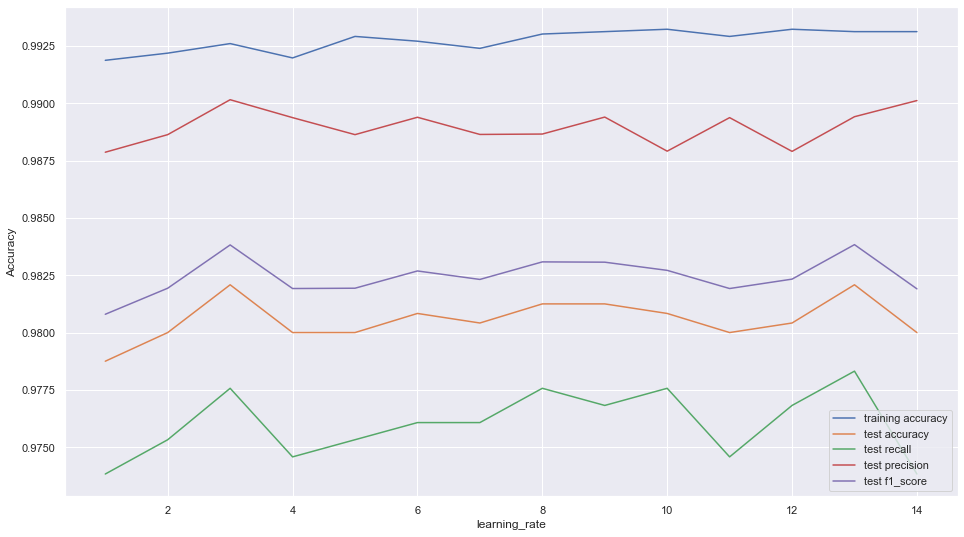

In [115]:
from catboost import CatBoostClassifier
model_catboss = CatBoostClassifier(learning_rate = 0.6, depth = 8, rsm = 1)

model_catboss.fit(X_train, Y_train)
#predicting the target value from the model for the samples
y_train_cat = model_catboss.predict(X_train)
y_test_cat = model_catboss.predict(X_test)

show_result('CatBoost Classifier', y_train_cat, y_test_cat)

# training_accuracy = []
# test_accuracy = []
# # try learning_rate from 0.1 to 0.9
# depth = range(1,10)
# for n in depth:
#     forest_test =  CatBoostClassifier(learning_rate = n*0.1)

#     forest_test.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(forest_test.score(X_train, y_train))
#     # record generalization accuracy
#     test_accuracy.append(forest_test.score(X_test, y_test))

re_training(CatBoostClassifier, 'learning_rate', 1, 15, 0.1)

In [116]:
#plotting the training & testing accuracy for n_estimators from 1 to 50
# plt.figure(figsize=None)
# plt.plot(depth, training_accuracy, label="training accuracy")
# plt.plot(depth, test_accuracy, label="test accuracy")
# plt.ylabel("Accuracy")  
# plt.xlabel("learning_rate")
# plt.legend();

NameError: name 'depth' is not defined

<Figure size 1152x648 with 0 Axes>

# **Deep Learning**

# **ANN**

In [121]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [122]:
# Create a Sequential Neural Network model 
model = Sequential()
# Create an Input and a Hidden Layer
model.add(Dense(units=50,activation="relu",kernel_initializer="he_uniform"))
# Create an Output Layer
model.add(Dense(units=1,activation="sigmoid"))
# Now, my model is ready to compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [123]:
model.fit(X_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
151/151 [==============================] - 2s 4ms/step - loss: 0.5066 - accuracy: 0.7883
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 0.3028 - accuracy: 0.8760
Epoch 3/100
151/151 [==============================] - 1s 6ms/step - loss: 0.2376 - accuracy: 0.9197
Epoch 4/100
151/151 [==============================] - 1s 6ms/step - loss: 0.1993 - accuracy: 0.9310
Epoch 5/100
151/151 [==============================] - 1s 5ms/step - loss: 0.1751 - accuracy: 0.9394
Epoch 6/100
151/151 [==============================] - 1s 6ms/step - loss: 0.1633 - accuracy: 0.9415
Epoch 7/100
151/151 [==============================] - 1s 6ms/step - loss: 0.1504 - accuracy: 0.9434
Epoch 8/100
151/151 [==============================] - 1s 6ms/step - loss: 0.1420 - accuracy: 0.9476
Epoch 9/100
151/151 [==============================] - 1s 6ms/step - loss: 0.1370 - accuracy: 0.9483
Epoch 10/100
151/151 [==============================] - 1s 6ms/step - loss: 0.1352 - accura

151/151 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9815
Epoch 82/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9818
Epoch 83/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9813
Epoch 84/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9818
Epoch 85/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9827
Epoch 86/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9821
Epoch 87/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9817
Epoch 88/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9823
Epoch 89/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9819
Epoch 90/100
151/151 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [125]:
# Predict the X_test results
y_pred = model.predict(X_test)

76/76 [==============================] - 0s 2ms/step


In [126]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [127]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(y_pred_label,y_test))
# recall_score
print('3. recall_score: ', recall_score(y_pred_label,y_test))
# precision_score
print('4. precision_score: ', precision_score(y_pred_label,y_test))
# f1_score
print('5. f1_score: ', f1_score(y_pred_label,y_test))

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9750104123281966
2. confusion_matrix:
[[1047   44]
 [  16 1294]]
3. recall_score:  0.9877862595419847
4. precision_score:  0.9671150971599403
5. f1_score:  0.9773413897280968


# **LSTM**

In [128]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Dropout

In [129]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [130]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
301/301 [==============================] - 46s 92ms/step - loss: 0.1427
Epoch 2/100
301/301 [==============================] - 28s 94ms/step - loss: 0.0995
Epoch 3/100
301/301 [==============================] - 21s 71ms/step - loss: 0.0774
Epoch 4/100
301/301 [==============================] - 20s 67ms/step - loss: 0.0448
Epoch 5/100
301/301 [==============================] - 19s 64ms/step - loss: 0.0392
Epoch 6/100
301/301 [==============================] - 25s 83ms/step - loss: 0.0347
Epoch 7/100
301/301 [==============================] - 28s 93ms/step - loss: 0.0335
Epoch 8/100
301/301 [==============================] - 28s 92ms/step - loss: 0.0308
Epoch 9/100
301/301 [==============================] - 27s 91ms/step - loss: 0.0299
Epoch 10/100
301/301 [==============================] - 33s 109ms/step - loss: 0.0303
Epoch 11/100
301/301 [==============================] - 25s 84ms/step - loss: 0.0272
Epoch 12/100
301/301 [==============================] - 27s 90ms/step - l

301/301 [==============================] - 17s 57ms/step - loss: 0.0117
Epoch 98/100
301/301 [==============================] - 16s 54ms/step - loss: 0.0133
Epoch 99/100
301/301 [==============================] - 19s 64ms/step - loss: 0.0117
Epoch 100/100
301/301 [==============================] - 16s 55ms/step - loss: 0.0150


In [131]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 29, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 29, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 29, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 29, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 29, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 29, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [132]:
# Predict the X_test results
y_pred = regressor.predict(X_test)

76/76 [==============================] - 3s 17ms/step


In [133]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [134]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(y_pred_label,y_test))
# recall_score
print('3. recall_score: ', recall_score(y_pred_label,y_test))
# precision_score
print('4. precision_score: ', precision_score(y_pred_label,y_test))
# f1_score
print('5. f1_score: ', f1_score(y_pred_label,y_test))

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.9762598917117867
2. confusion_matrix:
[[1043   37]
 [  20 1301]]
3. recall_score:  0.9848599545798638
4. precision_score:  0.9723467862481315
5. f1_score:  0.9785633696878526


# ***Kết thúc!***